<a href="https://colab.research.google.com/github/NuoWenLei/AAPI-text-analysis-project/blob/main/notebooks/Control_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7/19/2021 Cells (Get Articles)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
big_url = "https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22abcnews.go.com%22%7D%2C%7B%22dateStart%22%3A%222020-07-19%22%2C%22dateEnd%22%3A%222021-07-19%22%2C%22lang%22%3A%22eng%22%7D%5D%7D%2C%22%24filter%22%3A%7B%22dataType%22%3A%5B%22news%22%5D%2C%22isDuplicate%22%3A%22skipDuplicates%22%7D%7D&resultType=articles&articlesSortBy=rel&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&includeSourceDescription=true&includeSourceLocation=true&includeSourceRanking=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"

In [ ]:
import json

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json", "r") as outlets_json:
  outlets = json.load(outlets_json)

In [ ]:
outlets[0]

{'source_link': '/news-source/abc-news-media-bias',
 'source_name': 'ABC News',
 'source_position': 'Lean Left',
 'source_score': 355101,
 'source_uri': 'abcnews.go.com'}

In [ ]:
import pandas as pd, numpy as np

In [ ]:
full_df = pd.DataFrame(outlets)

In [ ]:
full_df.head()

,source_score,source_name,source_uri,source_link,source_position
0,355101,ABC News,abcnews.go.com,/news-source/abc-news-media-bias,Lean Left
1,12871,Above the Law,abovethelaw.com,/news-source/above-law-media-bias,Lean Left
2,676315,Anadolu Ajansı,aa.com.tr,/news-source/aj-media-bias,Left
3,63628,Al Jazeera Online,aljazeera.com,/news-source/al-jazeera-media-bias,Lean Left
4,41349,Alternet.org,alternet.org,/news-source/alternet-media-bias,Left


In [ ]:
filtered_data = []
uri_namespace = []
for i, row in full_df.iterrows():
  if row['source_uri'] in uri_namespace:
    print(row['source_uri'])
    continue
  filtered_data.append(row)
  uri_namespace.append(row['source_uri'])
filtered_df = pd.DataFrame(filtered_data, columns = full_df.columns)
filtered_df.head()

cnnturk.com
foxnews.com
nypost.com
nytimes.com
npr.org
commercialappeal.com
dailymail.co.uk
dispatch.com
vanityfair.com
wsj.com


,source_score,source_name,source_uri,source_link,source_position
0,355101,ABC News,abcnews.go.com,/news-source/abc-news-media-bias,Lean Left
1,12871,Above the Law,abovethelaw.com,/news-source/above-law-media-bias,Lean Left
2,676315,Anadolu Ajansı,aa.com.tr,/news-source/aj-media-bias,Left
3,63628,Al Jazeera Online,aljazeera.com,/news-source/al-jazeera-media-bias,Lean Left
4,41349,Alternet.org,alternet.org,/news-source/alternet-media-bias,Left


In [ ]:
filtered_df.shape

(315, 5)

In [ ]:
outlet = {'uri':'npr.org'}
try_url = f"https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22%24or%22%3A%5B%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22title%22%7D%2C%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22body%22%7D%5D%7D%2C%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22{outlet['uri']}%22%7D%2C%7B%22lang%22%3A%22eng%22%7D%5D%7D%2C%22%24filter%22%3A%7B%22isDuplicate%22%3A%22skipDuplicates%22%7D%7D&dataType=news&resultType=articles&articlesSortBy=date&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&includeArticleLocation=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"

In [ ]:
r = requests.get(try_url, verify = False)

In [ ]:
r

<Response [200]>

In [ ]:
r.text

'JSON_CALLBACK({"articles":{"page":1,"totalResults":1,"pages":1,"results":[{"uri":"6518486203","lang":"eng","isDuplicate":false,"date":"2021-04-13","time":"16:48:00","dateTime":"2021-04-13T16:48:00Z","dateTimePub":"2021-04-13T16:35:00Z","dataType":"news","sim":0.7019608020782471,"url":"https://www.npr.org/2021/04/13/986749681/enough-is-enough-democrats-push-for-gop-support-on-asian-american-hate-crimes-bi","title":"\'Enough Is Enough\': Democrats Push For GOP Support On Asian American Hate Crimes Bill","body":"Hawaii Sen. Mazie Hirono, seen here at the Capitol in February, sponsored the COVID-19 Hate Crimes Act to address the rise of violence targeted at Asian Americans and Pacific Islanders.\\n\\nTop congressional Democrats are calling on their Republican colleagues to support legislation introduced by Sen. Mazie Hirono and Rep. Grace Meng that addresses the rising number of hate crimes and violence against Asian Americans.\\n\\n\\"For more than a year, the Asian American community ha

In [ ]:
import json

In [ ]:
test_group_full_df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_5_2021.csv")
test_group_full_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [ ]:
# To keep exact same distribution, get from same sources
prev_sources = test_group_full_df['source_uri'].unique()

In [ ]:
print(len(prev_sources))

69


In [ ]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [ ]:
full_texts_1 = []
full_jsons_1 = []
parsed_json_1 = []
for i, k in enumerate(prev_sources):
  try:
    if i % 50 == 0:
      print(i)
      print(k)
    url = f"https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22{k}%22%7D%2C%7B%22dateStart%22%3A%222020-07-19%22%2C%22dateEnd%22%3A%222021-07-19%22%2C%22lang%22%3A%22eng%22%7D%5D%7D%2C%22%24filter%22%3A%7B%22dataType%22%3A%5B%22news%22%5D%2C%22isDuplicate%22%3A%22skipDuplicates%22%7D%7D&resultType=articles&articlesSortBy=rel&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&includeSourceDescription=true&includeSourceLocation=true&includeSourceRanking=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"
    r = requests.get(url, verify = False)
    full_texts_1.append(r.text)
    json_res = json.loads(r.text.lstrip('JSON_CALLBACK').strip('(').strip(')'))
    full_jsons_1.append(json_res)
    parsed_json_1.append(json_res['articles']['results'])
  except Exception as e:
    print(i)
    print(e)

0
abcnews.go.com
50
tampabay.com


In [ ]:
parsed_json_1[0][0]['title']

"Montana's top prosecutor bans critical race theory programs"

In [ ]:
full_articles = []
for news in parsed_json_1:
  full_articles.extend(news)

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data"

In [ ]:
import os

In [ ]:
with open(os.path.join(main_path, 'Asian_American_Articles_in_last_year.json'), 'w') as aapi_json:
  json.dump(full_articles, aapi_json)

In [ ]:
len(full_articles)

1386

# 7/19/2021 Cells Continued(Join Article and Outlet Data, Convert to DataFrame, section 1)

In [ ]:
import json, pandas as pd, numpy as np

In [ ]:
with open(os.path.join(main_path, 'Asian_American_Articles_in_last_year.json'), 'r') as aapi_json:
  articles = json.load(aapi_json)

In [ ]:
articles[0].keys()

dict_keys(['uri', 'lang', 'isDuplicate', 'date', 'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 'url', 'title', 'body', 'source', 'authors', 'concepts', 'categories', 'image', 'eventUri', 'shares', 'sentiment', 'wgt', 'relevance'])

In [ ]:
articles[0]['concepts'][0]

{'label': {'eng': 'Critical race theory'},
 'score': 5,
 'synonyms': {},
 'trendingScore': {'news': {'nullPopFq': 0, 'score': 0, 'testPopFq': 0}},
 'type': 'wiki',
 'uri': 'http://en.wikipedia.org/wiki/Critical_race_theory'}

In [ ]:
len(articles)

1386

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
article_data = []
tokenized_articles = []

for i, article in enumerate(articles):
  if i % 50 == 0:
    print(i)
  obj = {}
  obj['sentiment'] = article['sentiment']
  obj['relevance'] = article['relevance']
  obj['uri'] = article['uri']
  obj['title'] = article['title']
  obj['body'] = article['body']
  obj['source_uri'] = article['source']['uri']
  obj['source_name'] = article['source']['title']
  obj['source_alexaCountryRank'] = article['source']['ranking']['alexaCountryRank']
  obj['source_alexaGlobalRank'] = article['source']['ranking']['alexaGlobalRank']
  obj['source_importanceRank'] = article['source']['ranking']['importanceRank']
  obj['source_valid_location'] = article['source']['locationValidated']
  obj['date'] = article['date']
  tokenized_title = []
  tokenized_body = []
  for sent in sent_tokenize(article['title']):
    tokenized_title.extend(word_tokenize(sent))

  for sent in sent_tokenize(article['body']):
    tokenized_body.extend(word_tokenize(sent))

  obj['json_data'] = json.dumps(article)

  obj['title_length'] = len(tokenized_title)
  obj['body_length'] = len(tokenized_body)
  tokenized_articles.append({'title': tokenized_title, 'body': tokenized_body})



  article_data.append(obj)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [ ]:
article_data[0]

{'body': 'HELENA, Mont. -- Montana\'s top prosecutor issued an opinion Thursday labeling critical race theory and some antiracism programs taught in schools as "discriminatory" and said they violate federal and state law.\n\nRepublican Attorney General Austin Knudsen\'s decision bans the activities -- which are also used for employee training -- in the state. It came after Republican Superintendent of Public Instruction Elsie Arntzen requested earlier this month for Knudsen to weigh in on the issue.\n\nMontana with the decision became the latest of several Republican - controlled states to decry critical race theory as an attempt to pit racial groups against each other and teach that certain groups are responsible for injustices of the past. Supporters of the theory say it is a way to look at how race and racism have shaped the nation.\n\nKnudsen\'s decision was slammed by the Montana Federation of Public Employees, which represents many government workers in the state, including schoo

In [ ]:
article_df = pd.DataFrame(article_data)
print(article_df.shape)
article_df.head()

(1386, 15)


,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length
0,-0.168627,16,6580621447,Montana's top prosecutor bans critical race th...,"HELENA, Mont. -- Montana's top prosecutor issu...",abcnews.go.com,ABC News,171,615,150359,True,2021-05-27,"{""uri"": ""6580621447"", ""lang"": ""eng"", ""isDuplic...",9,443
1,-0.043137,13,6451178035,City where Trayvon Martin died seeks racial in...,"SANFORD, Fla. -- Commissioners in the city whe...",abcnews.go.com,ABC News,171,615,150359,True,2021-02-26,"{""uri"": ""6451178035"", ""lang"": ""eng"", ""isDuplic...",9,494
2,-0.498039,12,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,"{""uri"": ""6589548036"", ""lang"": ""eng"", ""isDuplic...",13,156
3,-0.200000,11,6587137123,Report on racism at Virginia Military Institut...,"LEXINGTON, Va. -- The findings of a monthslong...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-01,"{""uri"": ""6587137123"", ""lang"": ""eng"", ""isDuplic...",9,250
4,-0.200000,11,6448646954,SPLC: At least 160 Confederate symbols taken d...,NEW YORK -- When rioters tore through the U.S....,abcnews.go.com,ABC News,171,615,150359,True,2021-02-25,"{""uri"": ""6448646954"", ""lang"": ""eng"", ""isDuplic...",11,1079


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

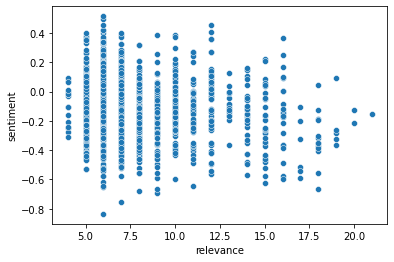

In [ ]:
sns.scatterplot(data = article_df, x = 'relevance', y = 'sentiment')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
article_df.dtypes.values

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('bool'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('int64')], dtype=object)

In [ ]:
str(article_df.dtypes.values[-5])

'bool'

In [ ]:
article_df = article_df.dropna()

In [ ]:
numeric_article_df = article_df.select_dtypes(['number'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
X_ = minmax.fit_transform(numeric_article_df)
X_df = pd.DataFrame(X_, columns = numeric_article_df.columns)
X_df.head()

,sentiment,relevance,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length
0,0.494186,0.705882,0.00122,0.000939,0.262207,0.291667,0.063789
1,0.587209,0.529412,0.00122,0.000939,0.262207,0.291667,0.072775
2,0.250000,0.470588,0.00122,0.000939,0.262207,0.458333,0.013216
3,0.470930,0.411765,0.00122,0.000939,0.262207,0.291667,0.029780
4,0.470930,0.411765,0.00122,0.000939,0.262207,0.375000,0.175859


In [ ]:
all_r2_scores = []
tried_feature_combos = []
for name in X_df.columns.values:
  for name_2 in X_df.columns.values:
    if name == name_2:
      continue
    if [name, name_2] in tried_feature_combos:
      continue
    tried_feature_combos.append([name, name_2])
    tried_feature_combos.append([name_2, name])
    all_r2_scores.append([name, name_2, r2_score(article_df[name].values, article_df[name_2].values)])

    
sorted_r2_scores = sorted(all_r2_scores, key = lambda x: x[-1], reverse = True)
sorted_r2_scores[:5]

[['source_alexaGlobalRank', 'body_length', -0.10145578826162649],
 ['source_alexaGlobalRank', 'title_length', -0.11245737866208483],
 ['source_alexaCountryRank', 'body_length', -0.11475145479617987],
 ['source_alexaCountryRank', 'title_length', -0.17894951907510914],
 ['relevance', 'title_length', -3.0693748599807726]]

In [ ]:
sorted_r2_scores

[['source_alexaGlobalRank', 'body_length', -0.10145578826162649],
 ['source_alexaGlobalRank', 'title_length', -0.11245737866208483],
 ['source_alexaCountryRank', 'body_length', -0.11475145479617987],
 ['source_alexaCountryRank', 'title_length', -0.17894951907510914],
 ['relevance', 'title_length', -3.0693748599807726],
 ['source_importanceRank', 'body_length', -3.2618319441697405],
 ['source_importanceRank', 'title_length', -3.291693957657361],
 ['source_alexaGlobalRank', 'source_importanceRank', -10.612856164318679],
 ['source_alexaCountryRank', 'source_alexaGlobalRank', -21.32893420230182],
 ['source_alexaCountryRank', 'source_importanceRank', -394.4569645711441],
 ['sentiment', 'relevance', -1644.5866240648033],
 ['sentiment', 'title_length', -3581.3506075960163],
 ['title_length', 'body_length', -95723.42603218657],
 ['relevance', 'body_length', -143263.22536609072],
 ['relevance', 'source_alexaCountryRank', -14589875.535779104],
 ['sentiment', 'body_length', -30492746.668608036],


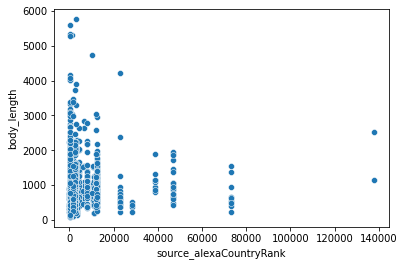

In [ ]:
sns.scatterplot(data = article_df, x = "source_alexaCountryRank", y = "body_length")

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json", "r") as outlets_json:
  cleaned_outlets = json.load(outlets_json)

In [ ]:
cleaned_outlets[0]

{'source_link': '/news-source/abc-news-media-bias',
 'source_name': 'ABC News',
 'source_position': 'Lean Left',
 'source_score': 355101,
 'source_uri': 'abcnews.go.com'}

In [ ]:
outlet_df = pd.DataFrame(cleaned_outlets)

In [ ]:
outlet_df.head()

,source_score,source_name,source_uri,source_link,source_position
0,355101,ABC News,abcnews.go.com,/news-source/abc-news-media-bias,Lean Left
1,12871,Above the Law,abovethelaw.com,/news-source/above-law-media-bias,Lean Left
2,676315,Anadolu Ajansı,aa.com.tr,/news-source/aj-media-bias,Left
3,63628,Al Jazeera Online,aljazeera.com,/news-source/al-jazeera-media-bias,Lean Left
4,41349,Alternet.org,alternet.org,/news-source/alternet-media-bias,Left


In [ ]:
article_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length
0,-0.168627,16,6580621447,Montana's top prosecutor bans critical race th...,"HELENA, Mont. -- Montana's top prosecutor issu...",abcnews.go.com,ABC News,171,615,150359,True,2021-05-27,"{""uri"": ""6580621447"", ""lang"": ""eng"", ""isDuplic...",9,443
1,-0.043137,13,6451178035,City where Trayvon Martin died seeks racial in...,"SANFORD, Fla. -- Commissioners in the city whe...",abcnews.go.com,ABC News,171,615,150359,True,2021-02-26,"{""uri"": ""6451178035"", ""lang"": ""eng"", ""isDuplic...",9,494
2,-0.498039,12,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,"{""uri"": ""6589548036"", ""lang"": ""eng"", ""isDuplic...",13,156
3,-0.200000,11,6587137123,Report on racism at Virginia Military Institut...,"LEXINGTON, Va. -- The findings of a monthslong...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-01,"{""uri"": ""6587137123"", ""lang"": ""eng"", ""isDuplic...",9,250
4,-0.200000,11,6448646954,SPLC: At least 160 Confederate symbols taken d...,NEW YORK -- When rioters tore through the U.S....,abcnews.go.com,ABC News,171,615,150359,True,2021-02-25,"{""uri"": ""6448646954"", ""lang"": ""eng"", ""isDuplic...",11,1079


In [ ]:
combined_data = []
for i, row in article_df.iterrows():
  combined_row = row.values.tolist()
  combined_row.extend(outlet_df[outlet_df['source_uri'] == row['source_uri']].drop(['source_uri', 'source_name'], axis = 1).iloc[0].values.tolist())
  combined_data.append(combined_row)
combined_df = pd.DataFrame(combined_data, columns = article_df.columns.values.tolist() + outlet_df.drop(['source_uri', 'source_name'], axis = 1).columns.values.tolist())
combined_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position
0,-0.168627,16,6580621447,Montana's top prosecutor bans critical race th...,"HELENA, Mont. -- Montana's top prosecutor issu...",abcnews.go.com,ABC News,171,615,150359,True,2021-05-27,"{""uri"": ""6580621447"", ""lang"": ""eng"", ""isDuplic...",9,443,355101,/news-source/abc-news-media-bias,Lean Left
1,-0.043137,13,6451178035,City where Trayvon Martin died seeks racial in...,"SANFORD, Fla. -- Commissioners in the city whe...",abcnews.go.com,ABC News,171,615,150359,True,2021-02-26,"{""uri"": ""6451178035"", ""lang"": ""eng"", ""isDuplic...",9,494,355101,/news-source/abc-news-media-bias,Lean Left
2,-0.498039,12,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,"{""uri"": ""6589548036"", ""lang"": ""eng"", ""isDuplic...",13,156,355101,/news-source/abc-news-media-bias,Lean Left
3,-0.200000,11,6587137123,Report on racism at Virginia Military Institut...,"LEXINGTON, Va. -- The findings of a monthslong...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-01,"{""uri"": ""6587137123"", ""lang"": ""eng"", ""isDuplic...",9,250,355101,/news-source/abc-news-media-bias,Lean Left
4,-0.200000,11,6448646954,SPLC: At least 160 Confederate symbols taken d...,NEW YORK -- When rioters tore through the U.S....,abcnews.go.com,ABC News,171,615,150359,True,2021-02-25,"{""uri"": ""6448646954"", ""lang"": ""eng"", ""isDuplic...",11,1079,355101,/news-source/abc-news-media-bias,Lean Left


In [ ]:
def get_sample_with_same_distribution(source, target):
  source_distribution = source['source_position'].value_counts() / source.shape[0]
  target_distribution = target['source_position'].value_counts()
  for position in target_distribution.index.values:
    # calculate what would be the needed distribution to use all of one position.

    # If it is unfulfillable (because it exceeds the amount of article from any one position),
    # the distribution cannot be used

    # Example:
    # Suppose we use all 606 Center articles that will
    # account for roughly 44% of the distribution.
    #
    # The total amount of articles in that case will be around 1377.
    #
    # Lean Left will have to account for 34% of 1377,
    # which is 468, exceeding the amount available.
    #
    # Thus that is not an unfulfillable distribution.

    total_needed = target_distribution[position] / source_distribution[position]

    for pos_compare in target_distribution.index.values:
      if target_distribution[pos_compare] < (source_distribution[pos_compare] * total_needed):
        break
    else:
      return total_needed, [source_distribution]


In [ ]:
total_needed, source_distribution = get_sample_with_same_distribution(test_group_full_df, combined_df)
total_needed

1113.578034682081

In [ ]:
source_distribution[0] * total_needed

Center        500.335260
Lean Left     383.000000
Right          84.127168
Left           81.913295
Lean Right     64.202312
Name: source_position, dtype: float64

In [ ]:
np.random.seed(101) # Reproducible Example

In [ ]:
new_distribution = np.floor(source_distribution[0] * total_needed).astype(np.int64)

In [ ]:
filtered_df_data = []
for position in new_distribution.index.values:
  filtered_df_data.extend(combined_df[combined_df['source_position'] == position].sample(new_distribution[position]).values.tolist())
filtered_combined_df = pd.DataFrame(filtered_df_data, columns = combined_df.columns)

In [ ]:
filtered_combined_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center
4,-0.388235,11,6491967421,Wallingford teen organizes rally in respon...,WALLINGFORD -- When Amy Bui first heard of the...,myrecordjournal.com,My Record Journal,72913,312056,499522,False,2021-03-25,"{""uri"": ""6491967421"", ""lang"": ""eng"", ""isDuplic...",9,393,9967,/news-source/record-journal,Center


In [ ]:
filtered_combined_df['source_position'].value_counts()

Center        500
Lean Left     383
Right          84
Left           81
Lean Right     64
Name: source_position, dtype: int64

In [ ]:
json.loads(filtered_combined_df.iloc[0]['json_data']).keys()

dict_keys(['uri', 'lang', 'isDuplicate', 'date', 'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 'url', 'title', 'body', 'source', 'authors', 'concepts', 'categories', 'image', 'eventUri', 'shares', 'sentiment', 'wgt', 'relevance'])

In [ ]:
# Get all concepts appeared
all_concept_names = []
all_concepts = []
for i, row in filtered_combined_df.iterrows():
  concepts = json.loads(row['json_data'])['concepts']

  for c in concepts:
    obj = {}
    obj['label'] = c['label']['eng']
    if obj['label'] in all_concept_names:
      continue
    obj['score'] = c['score']
    obj['type'] = c['type']
    obj['uri'] = c['uri']
    all_concept_names.append(obj['label'])
    all_concepts.append(obj)
len(all_concept_names)

7373

In [ ]:
# Get all concepts appeared
all_cat_uri = []
for i, row in filtered_combined_df.iterrows():
  categories = json.loads(row['json_data'])['categories']

  for c in categories:
    if c['uri'] in all_cat_uri:
      continue
    all_cat_uri.append(c['uri'])
len(all_cat_uri)

490

In [ ]:
with open(os.path.join(main_path, 'unique_article_concepts.json'), 'w') as unique_json:
  json.dump(all_concepts, unique_json)

In [ ]:
with open(os.path.join(main_path, 'unique_article_categories.json'), 'w') as unique_json:
  json.dump(all_cat_uri, unique_json)

In [ ]:
concept_frequency_dict = dict((n, 0) for n in all_concept_names)
category_frequency_dict = dict((n, 0) for n in all_cat_uri)

for i, row in filtered_combined_df.iterrows():
  concepts = json.loads(row['json_data'])['concepts']
  categories = json.loads(row['json_data'])['categories']

  for concept in concepts:
    concept_frequency_dict[concept['label']['eng']] += 1

  for cat in categories:
    category_frequency_dict[cat['uri']] += 1

In [ ]:
with open(os.path.join(main_path, "concept_frequency_dict.json"), "w") as concept_json:
  json.dump(concept_frequency_dict, concept_json)

In [ ]:
with open(os.path.join(main_path, "category_frequency_dict.json"), "w") as cat_json:
  json.dump(category_frequency_dict, cat_json)

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [ ]:
filtered_combined_df['source_position'].unique()

array(['Center', 'Lean Left', 'Right', 'Left', 'Lean Right'], dtype=object)

In [ ]:
position_dict = dict((n, i) for i, n in enumerate(filtered_combined_df['source_position'].unique().tolist()))

In [ ]:
position_dict

{'Center': 0, 'Lean Left': 1, 'Lean Right': 4, 'Left': 3, 'Right': 2}

In [ ]:
position_integer = [position_dict[i] for i in filtered_combined_df['source_position'].values]
filtered_combined_df['source_pos_int'] = position_integer

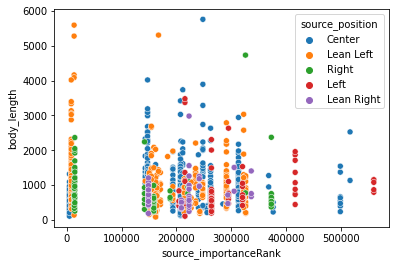

In [ ]:
sns.scatterplot(data = filtered_combined_df, x = "source_importanceRank", y = "body_length", hue = "source_position")

In [ ]:
filtered_combined_df.to_csv(os.path.join(main_path, "combined_dataframe.csv"), index = False)

# 7/19/2021 Cells Continued (Part of Speech Analysis, section 2)

In [ ]:
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [ ]:
from nltk.probability import FreqDist

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import json

In [ ]:
df = pd.read_csv(os.path.join(main_path, 'combined_dataframe.csv'))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0
4,-0.388235,11,6491967421,Wallingford teen organizes rally in respon...,WALLINGFORD -- When Amy Bui first heard of the...,myrecordjournal.com,My Record Journal,72913,312056,499522,False,2021-03-25,"{""uri"": ""6491967421"", ""lang"": ""eng"", ""isDuplic...",9,393,9967,/news-source/record-journal,Center,0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def pos_freq_update(pos_tags, stops, d):
  for w, p in pos_tags:
    if w in stops:
      continue
    if p in d.keys():
        d[p] += 1
    else:
        d[p] = 1
  return d

In [ ]:
import json

In [ ]:
stop_words = set(stopwords.words('english'))
body_pos_freq = {}
title_pos_freq = {}
title_docs = []
body_docs = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);
  title_words = []
  for sent in sent_tokenize(row['title']):
    title_words.extend(word_tokenize(sent))
  body_words = []
  for sent in sent_tokenize(row['body']):
    body_words.extend(word_tokenize(sent))
  title_docs.append(json.dumps(title_words))
  body_docs.append(json.dumps(body_words))
  title_pos_freq = pos_freq_update(nltk.pos_tag(title_words), stop_words, title_pos_freq)
  body_pos_freq = pos_freq_update(nltk.pos_tag(body_words), stop_words, body_pos_freq)

df['title_doc'] = title_docs
df['body_doc'] = body_docs


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [ ]:
title_pos_freq.keys()

dict_keys(['NNP', 'VBZ', 'NNS', 'MD', 'VB', 'NN', 'VBP', '$', 'CD', 'VBD', ':', 'VBG', 'JJ', ',', "''", 'RB', 'IN', 'POS', '``', '.', 'NNPS', 'VBN', 'TO', 'DT', 'SYM', 'WRB', 'RBR', 'PRP', 'WP', 'JJR', 'PRP$', 'JJS', 'CC', 'RP', 'PDT', 'RBS', '(', ')', 'FW', 'UH', 'WDT', 'EX'])

In [ ]:
body_pos_freq.keys()

dict_keys(['NNP', ':', 'DT', 'JJ', 'NN', 'VBN', 'VBZ', 'NNS', 'MD', 'VB', '.', 'CC', 'RB', ',', 'VBD', 'IN', 'VBP', '``', 'NNPS', 'JJR', "''", 'VBG', 'CD', 'RBR', 'PRP', 'POS', 'JJS', 'WRB', 'PRP$', 'WP', '$', 'FW', 'UH', 'TO', 'WDT', '(', ')', 'RP', '#', 'WP$', 'EX', 'PDT', 'SYM', 'RBS'])

In [ ]:
def pos_freq_count(pos_tags, stops, cols):
  d = dict((i, 0) for i in cols)
  for w, p in pos_tags:
    if w in stops:
      continue
    d[p] += 1
  return [d[i] for i in cols]

In [ ]:
title_pos_index = list(title_pos_freq.keys())
body_pos_index = list(body_pos_freq.keys())
title_pos_data = []
body_pos_data = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  title_pos_row = pos_freq_count(nltk.pos_tag(json.loads(row['title_doc'])), stop_words, title_pos_index)

  body_pos_row = pos_freq_count(nltk.pos_tag(json.loads(row['body_doc'])), stop_words, body_pos_index)

  title_pos_data.append(title_pos_row)

  body_pos_data.append(body_pos_row)

title_pos_df = pd.DataFrame(title_pos_data, columns = [f"title_{i}" for i in title_pos_index])

body_pos_df = pd.DataFrame(body_pos_data, columns = [f"body_{i}" for i in body_pos_index])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [ ]:
title_pos_df.head()

,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,title_.,title_NNPS,title_VBN,title_TO,title_DT,title_SYM,title_WRB,title_RBR,title_PRP,title_WP,title_JJR,title_PRP$,title_JJS,title_CC,title_RP,title_PDT,title_RBS,title_(,title_),title_FW,title_UH,title_WDT,title_EX
0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
body_pos_df.head()

,body_NNP,body_:,body_DT,body_JJ,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,103,2,6,61,99,19,16,50,3,28,33,5,11,20,11,7,10,3,2,1,4,11,6,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,121,3,14,51,137,21,15,75,4,37,40,8,13,42,28,9,6,9,7,2,11,13,26,0,4,14,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,108,10,6,61,138,18,13,56,7,33,49,4,21,69,32,12,18,21,0,1,21,20,8,0,23,3,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,28,3,1,26,33,10,1,15,2,10,10,0,2,24,9,3,1,8,3,0,6,9,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40,2,4,23,39,8,3,26,2,8,16,0,9,15,13,3,3,5,2,0,5,12,13,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pos_included_df = df.join(title_pos_df).join(body_pos_df)

In [ ]:
pos_included_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,99,19,16,50,3,28,33,5,11,20,11,7,10,3,2,1,4,11,6,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,137,21,15,75,4,37,40,8,13,42,28,9,6,9,7,2,11,13,26,0,4,14,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,138,18,13,56,7,33,49,4,21,69,32,12,18,21,0,1,21,20,8,0,23,3,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,33,10,1,15,2,10,10,0,2,24,9,3,1,8,3,0,6,9,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.388235,11,6491967421,Wallingford teen organizes rally in respon...,WALLINGFORD -- When Amy Bui first heard of the...,myrecordjournal.com,My Record Journal,72913,312056,499522,False,2021-03-25,"{""uri"": ""6491967421"", ""lang"": ""eng"", ""isDuplic...",9,393,9967,/news-source/record-journal,Center,0,"[""Wallingford"", ""teen"", ""organizes"", ""rally"", ...","[""WALLINGFORD"", ""--"", ""When"", ""Amy"", ""Bui"", ""f...",1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,...,39,8,3,26,2,8,16,0,9,15,13,3,3,5,2,0,5,12,13,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pos_included_df.shape

(1112, 107)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numeric_df = pos_included_df.select_dtypes(['number'])

In [ ]:
numeric_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,title_.,title_NNPS,title_VBN,title_TO,title_DT,title_SYM,title_WRB,title_RBR,title_PRP,title_WP,title_JJR,...,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,-0.411765,6,6562271338,12299,39825,313417,10,748,145605,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,19,16,50,3,28,33,5,11,20,11,7,10,3,2,1,4,11,6,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.121569,7,6478206548,12299,39825,313417,18,1080,145605,0,4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,21,15,75,4,37,40,8,13,42,28,9,6,9,7,2,11,13,26,0,4,14,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.043137,6,6198522667,688,4954,207467,10,1189,109816,0,1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,138,18,13,56,7,33,49,4,21,69,32,12,18,21,0,1,21,20,8,0,23,3,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.364706,16,6582206716,2613,5628,211617,10,326,126779,0,1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,10,1,15,2,10,10,0,2,24,9,3,1,8,3,0,6,9,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.388235,11,6491967421,72913,312056,499522,9,393,9967,0,1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,8,3,26,2,8,16,0,9,15,13,3,3,5,2,0,5,12,13,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
minmax = MinMaxScaler()
X_ = minmax.fit_transform(numeric_df)
X_df = pd.DataFrame(X_, columns = numeric_df.columns)
X_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,title_.,title_NNPS,title_VBN,title_TO,title_DT,title_SYM,title_WRB,title_RBR,title_PRP,title_WP,title_JJR,...,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,0.271605,0.117647,0.822120,0.089272,0.071082,0.555332,0.333333,0.117533,0.059080,0.0,0.076923,0.333333,0.4,1.0,0.333333,0.142857,0.333333,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120577,0.127517,0.190476,0.120988,0.075,0.207407,0.123016,0.166667,0.081481,0.065517,0.043137,0.095890,0.166667,0.030928,0.052632,0.045455,0.038095,0.076923,0.068182,0.2,0.015873,0.019231,0.076923,0.1,0.111111,0.066667,0.0000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.691358,0.176471,0.654486,0.089272,0.071082,0.555332,0.666667,0.176035,0.059080,0.0,0.307692,0.000000,0.6,0.0,0.000000,0.142857,0.333333,1.0,0.666667,0.5,0.5,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.170380,0.140940,0.178571,0.182716,0.100,0.274074,0.150794,0.266667,0.096296,0.141379,0.109804,0.123288,0.100000,0.092784,0.184211,0.090909,0.104762,0.090909,0.295455,0.0,0.031746,0.269231,0.000000,0.0,0.111111,0.000000,0.4375,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.629630,0.117647,0.096766,0.004973,0.008701,0.364869,0.333333,0.195242,0.044299,0.0,0.076923,0.000000,0.4,0.0,0.333333,0.142857,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.25,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.171691,0.120805,0.154762,0.135802,0.175,0.244444,0.186508,0.133333,0.155556,0.234483,0.125490,0.164384,0.300000,0.216495,0.000000,0.045455,0.200000,0.139860,0.090909,0.0,0.182540,0.057692,0.153846,0.0,0.111111,0.000000,0.0000,0.333333,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.308642,0.705882,0.861873,0.018949,0.009907,0.372329,0.333333,0.043172,0.051305,0.0,0.076923,0.000000,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.5,0.000000,1.00,0.666667,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034076,0.067114,0.011905,0.034568,0.050,0.074074,0.031746,0.000000,0.014815,0.079310,0.035294,0.041096,0.016667,0.082474,0.078947,0.000000,0.057143,0.062937,0.000000,0.0,0.039683,0.000000,0.076923,0.0,0.000000,0.000000,0.0000,0.333333,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.290123,0.411765,0.681926,0.529346,0.558079,0.889889,0.291667,0.054978,0.003063,0.0,0.076923,0.333333,0.2,0.0,0.000000,0.285714,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.25,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041940,0.053691,0.035714,0.061728,0.050,0.059259,0.055556,0.000000,0.066667,0.048276,0.050980,0.041096,0.050000,0.051546,0.052632,0.000000,0.047619,0.083916,0.147727,0.0,0.039683,0.019231,0.000000,0.1,0.000000,0.000000,0.0000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
pos_included_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,99,19,16,50,3,28,33,5,11,20,11,7,10,3,2,1,4,11,6,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,137,21,15,75,4,37,40,8,13,42,28,9,6,9,7,2,11,13,26,0,4,14,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,138,18,13,56,7,33,49,4,21,69,32,12,18,21,0,1,21,20,8,0,23,3,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,33,10,1,15,2,10,10,0,2,24,9,3,1,8,3,0,6,9,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.388235,11,6491967421,Wallingford teen organizes rally in respon...,WALLINGFORD -- When Amy Bui first heard of the...,myrecordjournal.com,My Record Journal,72913,312056,499522,False,2021-03-25,"{""uri"": ""6491967421"", ""lang"": ""eng"", ""isDuplic...",9,393,9967,/news-source/record-journal,Center,0,"[""Wallingford"", ""teen"", ""organizes"", ""rally"", ...","[""WALLINGFORD"", ""--"", ""When"", ""Amy"", ""Bui"", ""f...",1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,...,39,8,3,26,2,8,16,0,9,15,13,3,3,5,2,0,5,12,13,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


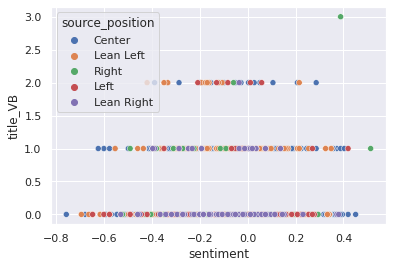

In [ ]:
sns.scatterplot(data = pos_included_df, x = "sentiment", y = "title_VB", hue = "source_position")

In [ ]:
pos_included_df.to_csv(os.path.join(main_path, "section_2_full_df.csv"), index = False)

# 7/19/2021 Cells (Grammar Analysis, section 3)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme()

In [ ]:
df = pd.read_csv(os.path.join(main_path, "section_2_full_df.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,body_NN,body_VBN,body_VBZ,body_NNS,body_MD,body_VB,body_.,body_CC,body_RB,"body_,",body_VBD,body_IN,body_VBP,body_``,body_NNPS,body_JJR,body_'',body_VBG,body_CD,body_RBR,body_PRP,body_POS,body_JJS,body_WRB,body_PRP$,body_WP,body_$,body_FW,body_UH,body_TO,body_WDT,body_(,body_),body_RP,body_#,body_WP$,body_EX,body_PDT,body_SYM,body_RBS
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,99,19,16,50,3,28,33,5,11,20,11,7,10,3,2,1,4,11,6,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,137,21,15,75,4,37,40,8,13,42,28,9,6,9,7,2,11,13,26,0,4,14,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,138,18,13,56,7,33,49,4,21,69,32,12,18,21,0,1,21,20,8,0,23,3,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,33,10,1,15,2,10,10,0,2,24,9,3,1,8,3,0,6,9,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.388235,11,6491967421,Wallingford teen organizes rally in respon...,WALLINGFORD -- When Amy Bui first heard of the...,myrecordjournal.com,My Record Journal,72913,312056,499522,False,2021-03-25,"{""uri"": ""6491967421"", ""lang"": ""eng"", ""isDuplic...",9,393,9967,/news-source/record-journal,Center,0,"[""Wallingford"", ""teen"", ""organizes"", ""rally"", ...","[""WALLINGFORD"", ""--"", ""When"", ""Amy"", ""Bui"", ""f...",1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,...,39,8,3,26,2,8,16,0,9,15,13,3,3,5,2,0,5,12,13,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1112, 107)

In [ ]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
df['body_adjective_per_noun'] = df['body_JJ'] / (df['body_NN'] + df['body_NNS'] + df['body_NNP'])

In [ ]:
df['title_adjective_per_noun'] = df['title_JJ'] / (df['title_NN'] + df['title_NNP'] + df['title_NNS'])

In [ ]:
print(df.columns.values)

['sentiment' 'relevance' 'uri' 'title' 'body' 'source_uri' 'source_name'
 'source_alexaCountryRank' 'source_alexaGlobalRank'
 'source_importanceRank' 'source_valid_location' 'date' 'json_data'
 'title_length' 'body_length' 'source_score' 'source_link'
 'source_position' 'source_pos_int' 'title_doc' 'body_doc' 'title_NNP'
 'title_VBZ' 'title_NNS' 'title_MD' 'title_VB' 'title_NN' 'title_VBP'
 'title_$' 'title_CD' 'title_VBD' 'title_:' 'title_VBG' 'title_JJ'
 'title_,' "title_''" 'title_RB' 'title_IN' 'title_POS' 'title_``'
 'title_.' 'title_NNPS' 'title_VBN' 'title_TO' 'title_DT' 'title_SYM'
 'title_WRB' 'title_RBR' 'title_PRP' 'title_WP' 'title_JJR' 'title_PRP$'
 'title_JJS' 'title_CC' 'title_RP' 'title_PDT' 'title_RBS' 'title_('
 'title_)' 'title_FW' 'title_UH' 'title_WDT' 'title_EX' 'body_NNP'
 'body_:' 'body_DT' 'body_JJ' 'body_NN' 'body_VBN' 'body_VBZ' 'body_NNS'
 'body_MD' 'body_VB' 'body_.' 'body_CC' 'body_RB' 'body_,' 'body_VBD'
 'body_IN' 'body_VBP' 'body_``' 'body_NNPS' 'body_J

In [ ]:
body_pos_tags = ['body_NNP', 'body_,', 'body_:', 'body_JJ', 'body_NNS', 'body_IN',
 'body_VBG', 'body_NN', 'body_.', 'body_DT', 'body_MD', 'body_VB', 'body_VBP',
 'body_PRP', 'body_POS', 'body_JJS', 'body_VBN', 'body_CD', 'body_RB',
 'body_VBD', 'body_VBZ', 'body_``', "body_''", 'body_EX', 'body_JJR', 'body_WP$',
 'body_NNPS', 'body_CC', 'body_WRB', 'body_PRP$', 'body_WP', 'body_RBR',
 'body_UH', 'body_(', 'body_)', 'body_#', 'body_$', 'body_RP', 'body_WDT',
 'body_TO', 'body_PDT', 'body_FW', 'body_RBS']
 
title_pos_tags = ['title_JJ',
 'title_NNS', 'title_VBP', 'title_NN', 'title_NNP', 'title_:', 'title_VBZ',
 'title_JJR', 'title_MD', 'title_VBN', 'title_VB', 'title_VBD', 'title_NNPS',
 'title_VBG', 'title_IN', 'title_,', 'title_POS', "title_''", 'title_DT',
 'title_CD', 'title_WRB', 'title_RB', 'title_PRP', 'title_PRP$', 'title_RP',
 'title_PDT', 'title_TO', 'title_``', 'title_FW', 'title_CC', 'title_.',
 'title_WP', 'title_JJS', 'title_(', 'title_)', 'title_$', 'title_UH',
 'title_RBS']
for b_pos in body_pos_tags:
  df[f"{b_pos}_per_word"] = df[b_pos] / df["body_length"]

for t_pos in title_pos_tags:
  df[f"{t_pos}_per_word"] = df[t_pos] / df["title_length"]


In [ ]:
df.columns

Index(['sentiment', 'relevance', 'uri', 'title', 'body', 'source_uri',
       'source_name', 'source_alexaCountryRank', 'source_alexaGlobalRank',
       'source_importanceRank',
       ...
       'title_FW_per_word', 'title_CC_per_word', 'title_._per_word',
       'title_WP_per_word', 'title_JJS_per_word', 'title_(_per_word',
       'title_)_per_word', 'title_$_per_word', 'title_UH_per_word',
       'title_RBS_per_word'],
      dtype='object', length=190)

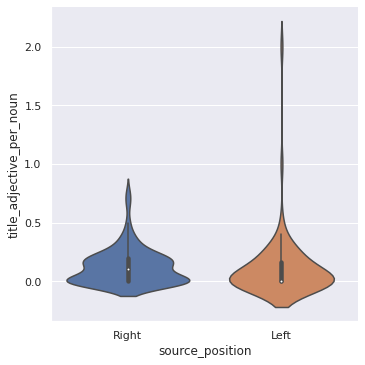

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_adjective_per_noun", kind = "violin")

In [ ]:
numeric_df = df.select_dtypes(['number'])
numeric_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,title_.,title_NNPS,title_VBN,title_TO,title_DT,title_SYM,title_WRB,title_RBR,title_PRP,title_WP,title_JJR,...,body_FW_per_word,body_RBS_per_word,title_JJ_per_word,title_NNS_per_word,title_VBP_per_word,title_NN_per_word,title_NNP_per_word,title_:_per_word,title_VBZ_per_word,title_JJR_per_word,title_MD_per_word,title_VBN_per_word,title_VB_per_word,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word
0,-0.411765,6,6562271338,12299,39825,313417,10,748,145605,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.200000,0.100000,0.100000,0.100000,0.000000,0.100000,0.0,0.1,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.121569,7,6478206548,12299,39825,313417,18,1080,145605,0,4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.166667,0.055556,0.055556,0.222222,0.055556,0.000000,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0
2,0.043137,6,6198522667,688,4954,207467,10,1189,109816,0,1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000841,0.0,0.100000,0.200000,0.000000,0.100000,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.1,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,-0.364706,16,6582206716,2613,5628,211617,10,326,126779,0,1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.003067,0.0,0.400000,0.100000,0.000000,0.000000,0.100000,0.100000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.388235,11,6491967421,72913,312056,499522,9,393,9967,0,1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.111111,0.111111,0.000000,0.222222,0.111111,0.000000,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
cols_of_note = ['body_WRB_per_word', 'body_PDT_per_word', 'body_POS_per_word', 'body_FW_per_word', 'body_VB_per_word', 'body_MD_per_word', 'body_IN_per_word', 'body_DT_per_word', 'body_NN_per_word', 'title_length']

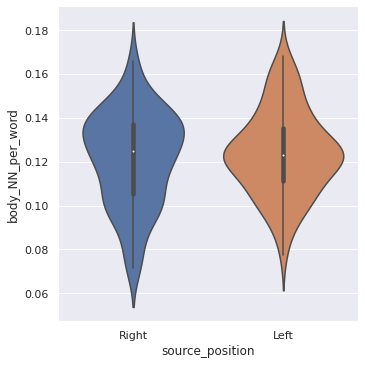

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_NN_per_word", kind = "violin")

In [ ]:
df['position_adjusted'] = 'center'
df.loc[df['source_position'].str.contains('Left'), 'position_adjusted'] = 'left'
df.loc[df['source_position'].str.contains('Right'), 'position_adjusted'] = 'right'
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,body_RBS_per_word,title_JJ_per_word,title_NNS_per_word,title_VBP_per_word,title_NN_per_word,title_NNP_per_word,title_:_per_word,title_VBZ_per_word,title_JJR_per_word,title_MD_per_word,title_VBN_per_word,title_VB_per_word,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.200000,0.100000,0.100000,0.100000,0.000000,0.100000,0.0,0.1,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.166667,0.055556,0.055556,0.222222,0.055556,0.000000,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.100000,0.200000,0.000000,0.100000,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.1,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,0.0,0.400000,0.100000,0.000000,0.000000,0.100000,0.100000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center
4,-0.388235,11,64919

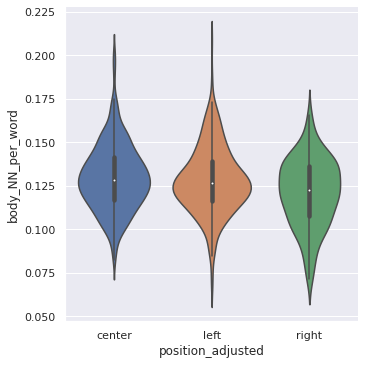

In [ ]:
sns.catplot(data = df, x = "position_adjusted", y = "body_NN_per_word", kind = "violin")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#df_raw_for_sklearn = df[df['position_adjusted'] != 'center']
df_raw_for_sklearn = df[df['source_position'].isin(['Left', 'Right'])]
cols_with_per_word = [i for i in df_raw_for_sklearn.columns if '_per_word' in i]
X_raw = df_raw_for_sklearn.select_dtypes(['number'])[cols_with_per_word]
minmax = MinMaxScaler()
X_ = minmax.fit_transform(X_raw)
#y_ = np.where(df_raw_for_sklearn['position_adjusted'] == 'left', 1, 0)
y_ = np.where(df_raw_for_sklearn['source_position'] == 'Left', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size = .8, random_state = 0)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7575757575757576

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.7272727272727273

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.696969696969697

In [ ]:
rf_sorted_list = list(sorted(list(zip(X_raw.columns.values, rf_clf.feature_importances_)), key = lambda x: x[1], reverse = True))

In [ ]:
rf_sorted_list[:5]

[('body_``_per_word', 0.07398843282774835),
 ('body_VBD_per_word', 0.07031458981288945),
 ("body_''_per_word", 0.05248797816523254),
 ('body_NNP_per_word', 0.049585387668840894),
 ('body_VB_per_word', 0.03674985673141211)]

In [ ]:
log_sorted_list = list(sorted(list(zip(X_raw.columns.values.tolist(), log_clf.coef_[0])), key = lambda x: x[1], reverse = True))

In [ ]:
log_sorted_list[:5]

[('body_VB_per_word', 0.9205273371327252),
 ('body_:_per_word', 0.9190285517502564),
 ('body_JJS_per_word', 0.8157072984414533),
 ('title_CC_per_word', 0.7177277632654809),
 ('body_JJ_per_word', 0.7126553771072965)]

In [ ]:
log_sorted_list[-5:]

[('body_``_per_word', -0.8835022829217632),
 ('title_NN_per_word', -0.9073637647093905),
 ('body_NNP_per_word', -1.1364503888932127),
 ("body_''_per_word", -1.3271277077856527),
 ('body_VBD_per_word', -1.6261435617655278)]

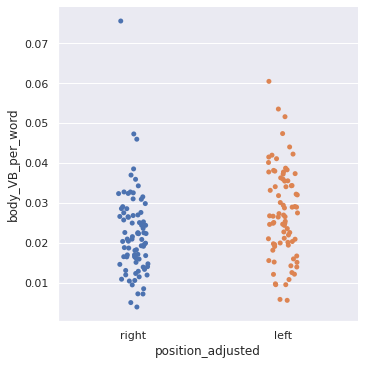

In [ ]:
sns.catplot(data = df_raw_for_sklearn, x = "position_adjusted", y = "body_VB_per_word")

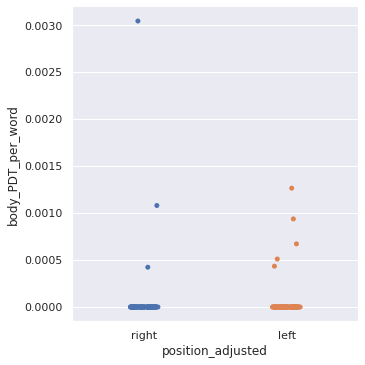

In [ ]:
sns.catplot(data = df_raw_for_sklearn, x = "position_adjusted", y = "body_PDT_per_word")

In [ ]:
df.iloc[0]['body']

'WASHINGTON -- A national terrorism alert issued Friday warns that violent extremists may take advantage of the easing of pandemic restrictions to conduct attacks.\n\nThe alert does not cite any specific threats. But it warns of potential danger from an increasingly complex and volatile mix that includes domestic terrorists inspired by various grievances, racial or ethnic hatred and influences from abroad.\n\nThose threats were exacerbated by COVID-19, which spawned conspiracy theories and deepened anger at the government in some quarters over the shutdown of the economy. As virus conditions improve, the alert says new dangers loom.\n\n"Violent extremists may seek to exploit the easing of COVID-19-related restrictions across the United States to conduct attacks against a broader range of targets after previous public capacity limits reduced opportunities for lethal attacks," the bulletin said.\n\nWithout naming any specific potential targets, it notes that, historically, extremists mot

In [ ]:
nltk.download([
               'averaged_perceptron_tagger',
               'punkt',
               'vader_lexicon',
               'stopwords'
])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(df.iloc[0]['body'])

{'compound': -0.9964, 'neg': 0.173, 'neu': 0.724, 'pos': 0.103}

In [ ]:
nltk_sentiment_body = dict((a, []) for a in ['compound', 'neg', 'neu', 'pos'])
nltk_sentiment_title = dict((a, []) for a in ['compound', 'neg', 'neu', 'pos'])
for i, row in df.iterrows():
  body_dict = sia.polarity_scores(row['body'])
  title_dict = sia.polarity_scores(row['title'])
  for k in body_dict.keys():
    nltk_sentiment_body[k].append(body_dict[k])
    nltk_sentiment_title[k].append(title_dict[k])

In [ ]:
for a in ['compound', 'neg', 'neu', 'pos']:
  df[f'nltk_body_sentiment_{a}'] = nltk_sentiment_body[a]
  df[f'nltk_title_sentiment_{a}'] = nltk_sentiment_title[a]

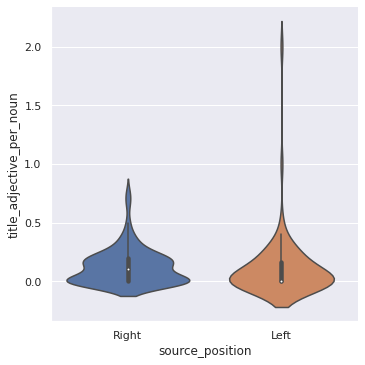

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_adjective_per_noun", kind = "violin")

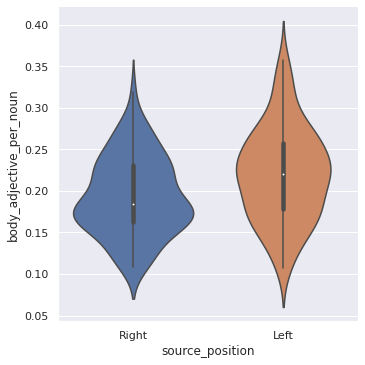

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_adjective_per_noun", kind = "violin")

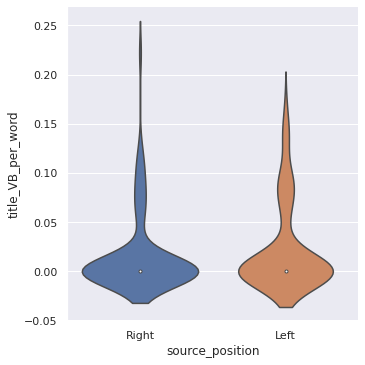

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_VB_per_word", kind = "violin")

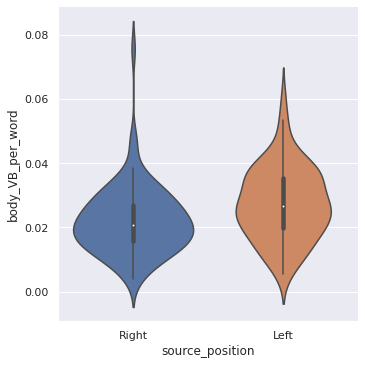

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_VB_per_word", kind = "violin")

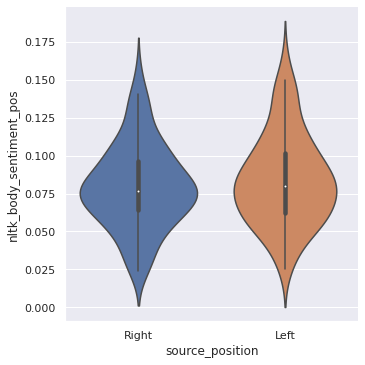

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_body_sentiment_pos", kind = "violin")

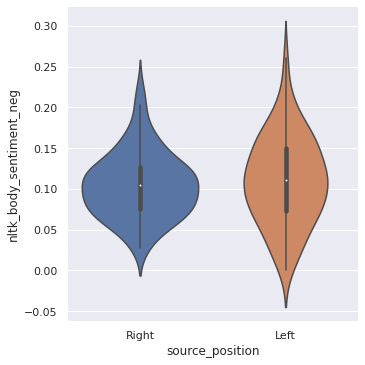

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_body_sentiment_neg", kind = "violin")

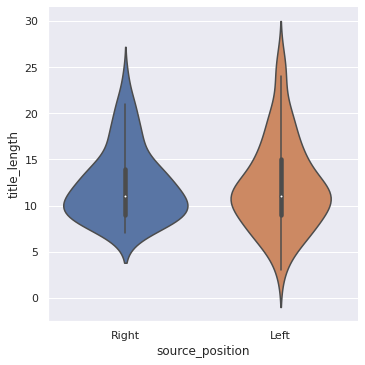

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_length", kind = "violin")

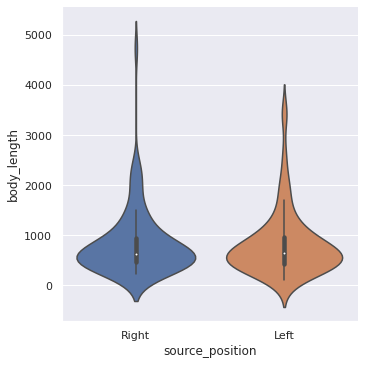

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_length", kind = "violin")

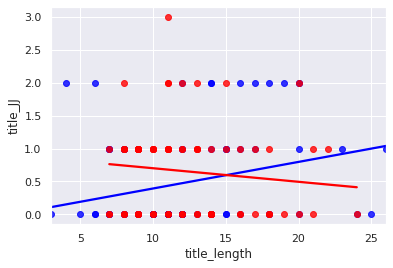

In [ ]:
sns.regplot(data = df[df['source_position'] == 'Left'], y = "title_JJ", x = "title_length", color = "blue", ci = None)
sns.regplot(data = df[df['source_position'] == 'Right'], y = "title_JJ", x = "title_length", color = "red", ci = None)

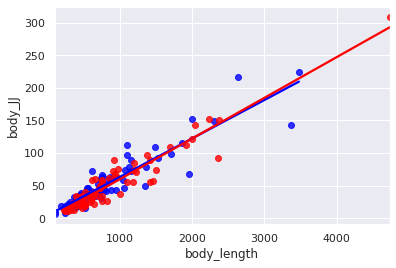

In [ ]:
sns.regplot(data = df[df['source_position'] == 'Left'], y = "body_JJ", x = "body_length", color = "blue", ci = None)
sns.regplot(data = df[df['source_position'] == 'Right'], y = "body_JJ", x = "body_length", color = "red", ci = None)

In [ ]:
from nltk.sentiment.util import mark_negation
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
s = 'I love to eat chicken wings, not chicken thighs.'
words = []
for sent in sent_tokenize(s):
  words.extend(word_tokenize(sent))

In [ ]:
mark_negation(words)

['I',
 'love',
 'to',
 'eat',
 'chicken',
 'wings',
 ',',
 'not',
 'chicken_NEG',
 'thighs_NEG',
 '.']

In [ ]:
negation_count_title = []
negation_count_body = []
for i, row in df.iterrows():
  title_neg = mark_negation(json.loads(row['title_doc']))
  title_count = 0
  for n in title_neg:
    if '_NEG' in n:
      title_count += 1
  
  body_neg = mark_negation(json.loads(row['body_doc']))
  body_count = 0
  for n in body_neg:
    if '_NEG' in n:
      body_count += 1
  
  negation_count_body.append(body_count)

  negation_count_title.append(title_count)

df['title_negation'] = negation_count_title
df['body_negation'] = negation_count_body


In [ ]:
df.shape

(1112, 201)

In [ ]:
df['title_negation_per_word'] = df['title_negation'] / df['title_length']
df['body_negation_per_word'] = df['body_negation'] / df['body_length']

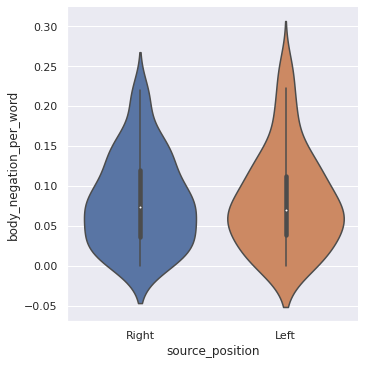

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_negation_per_word", kind = "violin")

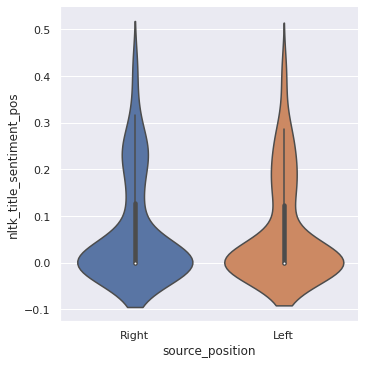

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_title_sentiment_pos", kind = "violin")

In [ ]:
df.to_csv(os.path.join(main_path, "section_3_full_df.csv"), index = False)

# 7/19/2021 Cells Continued (Word Frequency Analysis, section 4)

In [ ]:

import nltk, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, json


In [ ]:
df = pd.read_csv(os.path.join(main_path, "section_3_full_df.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9913,-0.4404,0.219,0.367,0.694,0.633,0.086,0.000,0,57,0.0,0.174847
4,-0.388235,11

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
import string
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
porter_stemmer = PorterStemmer()
title_stemmed = []
body_stemmed = []
stem_set_title = set()
stem_set_body = set()
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  stemmed_row_title = []
  for w in json.loads(row['title_doc']):
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    stem_set_title.add(stemmed_w)
    stemmed_row_title.append(stemmed_w)
  
  stemmed_row_body = []
  for w in json.loads(row['body_doc']):
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    stem_set_body.add(stemmed_w)
    stemmed_row_body.append(stemmed_w)

  title_stemmed.append(json.dumps(stemmed_row_title))
  body_stemmed.append(json.dumps(stemmed_row_body))


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [ ]:
df['title_stem'] = title_stemmed
df['body_stem'] = body_stemmed

In [ ]:
len(stem_set_title)

2568

In [ ]:
len(stem_set_body)

21673

In [ ]:
dict((a, 0) for a in df['source_position'].unique())

{'Center': 0, 'Lean Left': 0, 'Lean Right': 0, 'Left': 0, 'Right': 0}

In [ ]:
from tqdm import tqdm

In [ ]:
title_stem_data = []
for i, stem in enumerate(stem_set_title):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w in json.loads(row['title_stem']):
      if w == stem:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  title_stem_data.append(row_dict)

title_stem_df = pd.DataFrame(title_stem_data)
title_stem_df.head()


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


,Center,Lean Left,Right,Left,Lean Right,stem
0,2,0,0,0,0,nearli
1,1,2,2,0,0,need
2,0,0,0,1,0,perfect
3,0,1,0,0,0,columbia
4,1,0,0,0,0,woodward


In [ ]:
title_stem_df['usage_sum'] = title_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
title_stem_df.sort_values('usage_sum', ascending = False)

,Center,Lean Left,Right,Left,Lean Right,stem,usage_sum
2065,59,44,6,6,4,biden,119
2132,48,50,6,8,4,black,116
561,42,36,10,13,6,trump,107
744,43,34,4,2,4,racial,87
560,37,23,7,5,4,white,76
...,...,...,...,...,...,...,...
703,1,0,0,0,0,sculptur,1
705,1,0,0,0,0,anti-aapi,1
707,0,1,0,0,0,term,1
1592,0,0,1,0,0,defens,1


In [ ]:
title_stem_df['0_per_article_left'] = title_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
title_stem_df['1_per_article_lean_left'] = title_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
title_stem_df['4_per_article_right'] = title_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
title_stem_df['3_per_article_lean_right'] = title_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
title_stem_df['2_per_article_center'] = title_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]



In [ ]:
melt_title_df = pd.melt(title_stem_df, id_vars = ["stem", "usage_sum"], value_vars = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "4_per_article_right",
                                                                "3_per_article_lean_right",
                                                                "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df.head()

,stem,usage_sum,position,usage_per_article
0,nearli,2,0_per_article_left,0.000000
1,need,5,0_per_article_left,0.000000
2,perfect,1,0_per_article_left,0.012346
3,columbia,1,0_per_article_left,0.000000
4,woodward,1,0_per_article_left,0.000000


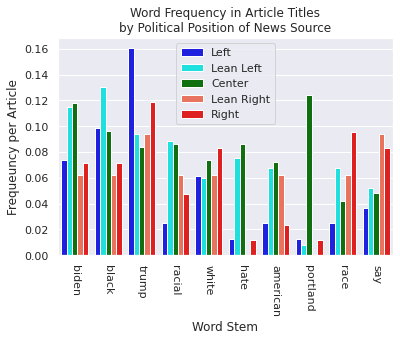

In [ ]:
sns.barplot(data = melt_title_df.sort_values('usage_sum', ascending = False).iloc[:50], x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'])

plt.xticks(rotation = -90)

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"])

plt.title("Word Frequency in Article Titles\nby Political Position of News Source")

plt.xlabel("Word Stem")

plt.ylabel("Frequeuncy per Article")

pass


In [ ]:
body_stem_data = []
for i, stem in enumerate(stem_set_body):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w in json.loads(row['body_stem']):
      if w == stem:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  body_stem_data.append(row_dict)

body_stem_df = pd.DataFrame(body_stem_data)
body_stem_df.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

,Center,Lean Left,Right,Left,Lean Right,stem
0,2,1,0,0,0,wholeheartedli
1,139,113,21,12,13,fund
2,1,0,0,0,0,lebanes
3,2,2,0,0,0,prescient
4,2,0,0,0,0,germain


In [ ]:
body_stem_df['usage_sum'] = body_stem_df.drop('stem', axis = 1).sum(axis = 1)
body_stem_df.sort_values('usage_sum', ascending = False).head()

,Center,Lean Left,Right,Left,Lean Right,stem,usage_sum
144,4226,3401,375,359,284,said,8645
532,2585,2165,391,360,246,the,5747
20339,1625,1797,207,186,208,I,4023
5091,1608,1696,248,300,140,black,3992
9271,1578,1585,210,301,165,peopl,3839


In [ ]:
body_stem_df['0_per_article_left'] = body_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
body_stem_df['1_per_article_lean_left'] = body_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
body_stem_df['4_per_article_right'] = body_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
body_stem_df['3_per_article_lean_right'] = body_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
body_stem_df['2_per_article_center'] = body_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
melt_body_df = pd.melt(body_stem_df, id_vars = ["stem", "usage_sum"], value_vars = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "4_per_article_right",
                                                                "3_per_article_lean_right",
                                                                "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df.head()

,stem,usage_sum,position,usage_per_article
0,wholeheartedli,3,0_per_article_left,0.000000
1,fund,298,0_per_article_left,0.148148
2,lebanes,1,0_per_article_left,0.000000
3,prescient,4,0_per_article_left,0.000000
4,germain,2,0_per_article_left,0.000000


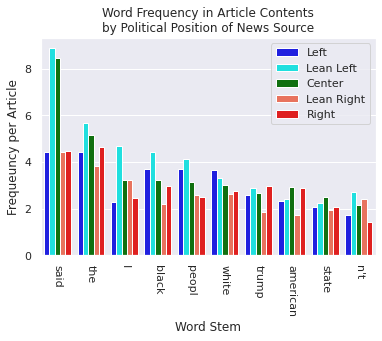

In [ ]:
sns.barplot(data = melt_body_df.sort_values('usage_sum', ascending = False).iloc[:50], x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'])

plt.xticks(rotation = -90)

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"])

plt.title("Word Frequency in Article Contents\nby Political Position of News Source")

plt.xlabel("Word Stem")

plt.ylabel("Frequeuncy per Article")

pass

In [ ]:
# Import Python Packages
import smtplib
# Set Global Variables
gmail_user = 'nuowen0612@gmail.com'
gmail_password = 'jgfllfxcxgegfwjn'
# Create Email 
mail_from = gmail_user
mail_to = 'nuowen.lei@concordacademy.org'
mail_subject = 'Finished Article Body Processing!'
mail_message_body = 'Go visit it!'

mail_message = '''\
From: %s
To: %s
Subject: %s
%s
''' % (mail_from, mail_to, mail_subject, mail_message_body)
# Sent Email
server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
server.login(gmail_user, gmail_password)
server.sendmail(mail_from, mail_to, mail_message)
server.close()

In [ ]:
title_stem_df.to_csv(os.path.join(main_path, "title_stem_dataframe.csv"), index = False)

In [ ]:
body_stem_df.to_csv(os.path.join(main_path, "body_stem_dataframe.csv"), index = False)

# 7/19/2021 Cells Continued (Part of Speech and Word Choice Combined Analysis, section 5)

In [ ]:
# Filter WORD CHOICE by PART OF SPEECH, like 10 HIGHEST-USED ADJECTIVES or NOUNS

In [ ]:
# Filter by political position

In [ ]:
# Start building a narrative

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

df = pd.read_csv(os.path.join(main_path, "section_3_full_df.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038
3,-0.364706,16,6582206716,"Biden: antisemitic attacks 'despicable, uncons...",WASHINGTON - US President Joe Biden released a...,jpost.com,The Jerusalem Post,2613,5628,211617,True,2021-05-28,"{""uri"": ""6582206716"", ""lang"": ""eng"", ""isDuplic...",10,326,126779,/news-source/jerusalem-post-media-bias,Center,0,"[""Biden"", "":"", ""antisemitic"", ""attacks"", ""'des...","[""WASHINGTON"", ""-"", ""US"", ""President"", ""Joe"", ...",1,0,1,0,0,0,0,0,0,0,1,0,4,2,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9913,-0.4404,0.219,0.367,0.694,0.633,0.086,0.000,0,57,0.0,0.174847
4,-0.388235,11

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import json

In [ ]:
porter_stemmer = PorterStemmer()
title_stemmed = []
title_stemmed_pos = []
body_stemmed = []
body_stemmed_pos = []
stem_set_title = []
stem_set_body = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  stemmed_row_title = []
  row_title_pos = []
  for w, p_ in nltk.pos_tag(json.loads(row['title_doc'])):
    p = p_[:2]
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    if [stemmed_w, p] not in stem_set_title:
      stem_set_title.append([stemmed_w, p])
    stemmed_row_title.append(stemmed_w)
    row_title_pos.append(p)
  
  stemmed_row_body = []
  row_body_pos = []
  for w, p_ in nltk.pos_tag(json.loads(row['body_doc'])):
    p = p_[:2]
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    if [stemmed_w, p] not in stem_set_body:
      stem_set_body.append([stemmed_w, p])
    stemmed_row_body.append(stemmed_w)
    row_body_pos.append(p)

  title_stemmed.append(json.dumps(stemmed_row_title))
  title_stemmed_pos.append(json.dumps(row_title_pos))
  body_stemmed.append(json.dumps(stemmed_row_body))
  body_stemmed_pos.append(json.dumps(row_body_pos))


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [ ]:
stem_set_title[:5]

[['u.s.', 'NN'],
 ['warn', 'VB'],
 ['extremist', 'NN'],
 ['may', 'MD'],
 ['strike', 'VB']]

In [ ]:
df['title_stem'] = title_stemmed

df['title_stem_pos'] = title_stemmed_pos

df['body_stem'] = body_stemmed

df['body_stem_pos'] = body_stemmed_pos

df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN""]","[""florham"", ""park"", ""new"", ""jersey"", ""sam"", ""d...","[""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""JJ..."
3,-0.364706,16,658220

In [ ]:
df.to_csv(os.path.join(main_path, "section_5_full_df.csv"), index = False)

In [ ]:
title_stem_data = []
print(f"Total: {len(stem_set_title)}")

for i, (stem, p) in enumerate(stem_set_title):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w, p1 in zip(json.loads(row['title_stem']), json.loads(row['title_stem_pos'])):
      if w == stem and p == p1:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  row_dict['pos'] = p
  title_stem_data.append(row_dict)

title_stem_df = pd.DataFrame(title_stem_data)
title_stem_df.head()

Total: 3062
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


,Center,Lean Left,Right,Left,Lean Right,stem,pos
0,17,3,0,1,1,u.s.,NN
1,4,0,2,0,1,warn,VB
2,3,1,1,1,1,extremist,NN
3,4,2,1,0,0,may,MD
4,1,0,1,0,0,strike,VB


In [ ]:
body_stem_data = []
print(f"Total: {len(stem_set_body)}")

for i, (stem, p) in enumerate(stem_set_body):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w, p1 in zip(json.loads(row['body_stem']), json.loads(row['body_stem_pos'])):
      if w == stem and p == p1:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  row_dict['pos'] = p
  body_stem_data.append(row_dict)

body_stem_df = pd.DataFrame(body_stem_data)
body_stem_df.head()

Total: 28585
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
1

,Center,Lean Left,Right,Left,Lean Right,stem,pos
0,395,295,52,94,48,washington,NN
1,382,335,48,40,18,A,DT
2,245,191,45,23,24,nation,JJ
3,63,57,13,12,4,terror,NN
4,1,6,1,0,0,alert,JJ


In [ ]:
title_stem_df['usage_sum'] = title_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
body_stem_df['usage_sum'] = body_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
title_stem_df['0_per_article_left'] = title_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
title_stem_df['1_per_article_lean_left'] = title_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
title_stem_df['4_per_article_right'] = title_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
title_stem_df['3_per_article_lean_right'] = title_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
title_stem_df['2_per_article_center'] = title_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]


In [ ]:
body_stem_df['0_per_article_left'] = body_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
body_stem_df['1_per_article_lean_left'] = body_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
body_stem_df['4_per_article_right'] = body_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
body_stem_df['3_per_article_lean_right'] = body_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
body_stem_df['2_per_article_center'] = body_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
for col in ["0_per_article_left", "1_per_article_lean_left", "4_per_article_right", "3_per_article_lean_right", "2_per_article_center"]:
  title_stem_df[f"{col}_copy"] = title_stem_df[col]
  body_stem_df[f"{col}_copy"] = body_stem_df[col]


In [ ]:
title_stem_df.sort_values('usage_sum', ascending = False).head()

,Center,Lean Left,Right,Left,Lean Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
27,58,43,6,6,4,biden,NN,117,0.074074,0.112272,0.071429,0.062500,0.116,0.074074,0.112272,0.071429,0.062500,0.116
180,47,48,6,7,2,black,NN,110,0.086420,0.125326,0.071429,0.031250,0.094,0.086420,0.125326,0.071429,0.031250,0.094
60,40,36,10,13,6,trump,NN,105,0.160494,0.093995,0.119048,0.093750,0.080,0.160494,0.093995,0.119048,0.093750,0.080
250,39,25,3,1,3,racial,JJ,71,0.012346,0.065274,0.035714,0.046875,0.078,0.012346,0.065274,0.035714,0.046875,0.078
17,62,3,1,1,0,portland,NN,67,0.012346,0.007833,0.011905,0.000000,0.124,0.012346,0.007833,0.011905,0.000000,0.124


In [ ]:
body_stem_df.sort_values('usage_sum', ascending = False).head()

,Center,Lean Left,Right,Left,Lean Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
77,4225,3400,375,359,284,said,VB,8643,4.432099,8.877285,4.464286,4.437500,8.450,4.432099,8.877285,4.464286,4.437500,8.450
18,2579,2161,377,359,237,the,DT,5713,4.432099,5.642298,4.488095,3.703125,5.158,4.432099,5.642298,4.488095,3.703125,5.158
575,1625,1797,207,186,208,I,PR,4023,2.296296,4.691906,2.464286,3.250000,3.250,2.296296,4.691906,2.464286,3.250000,3.250
147,1575,1582,210,301,165,peopl,NN,3833,3.716049,4.130548,2.500000,2.578125,3.150,3.716049,4.130548,2.500000,2.578125,3.150
436,1523,1589,210,281,85,black,NN,3688,3.469136,4.148825,2.500000,1.328125,3.046,3.469136,4.148825,2.500000,1.328125,3.046


In [ ]:
melt_title_df = pd.melt(title_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,u.s.,22,NN,0.012346,0.007833,0.000000,0.015625,0.034,0_per_article_left,0.012346
1,warn,7,VB,0.000000,0.000000,0.023810,0.015625,0.008,0_per_article_left,0.000000
2,extremist,7,NN,0.012346,0.002611,0.011905,0.015625,0.006,0_per_article_left,0.012346
3,may,7,MD,0.000000,0.005222,0.011905,0.000000,0.008,0_per_article_left,0.000000
4,strike,2,VB,0.000000,0.000000,0.011905,0.000000,0.002,0_per_article_left,0.000000


In [ ]:
melt_body_df = pd.melt(body_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,washington,884,NN,1.160494,0.770235,0.619048,0.75000,0.790,0_per_article_left,1.160494
1,A,823,DT,0.493827,0.874674,0.571429,0.28125,0.764,0_per_article_left,0.493827
2,nation,528,JJ,0.283951,0.498695,0.535714,0.37500,0.490,0_per_article_left,0.283951
3,terror,149,NN,0.148148,0.148825,0.154762,0.06250,0.126,0_per_article_left,0.148148
4,alert,8,JJ,0.000000,0.015666,0.011905,0.00000,0.002,0_per_article_left,0.000000


In [ ]:
def plot_word_usage_by_pos(melt_df, part_of_speech=None, political_position="usage_sum", title_ = "Word Frequency in Article Titles\nby Political Position of News Source", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  if part_of_speech is not None:

    filt_data = melt_df[melt_df['pos'] == part_of_speech.upper()].sort_values(to_sort, ascending = False)  

  top_stems = filt_data.groupby(['stem', 'pos']).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  for stem, pos in top_stems:
    filtered_data.extend(filt_data[(filt_data['stem'] == stem) & (filt_data['pos'] == pos)].values.tolist())

  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  sns.barplot(data = filtered_df, x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel("Word Stem")

  plt.ylabel("Frequeuncy per Article")

  plt.show()


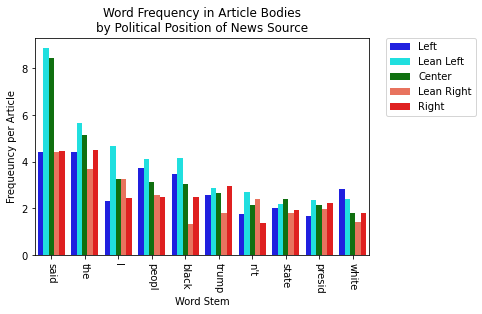

In [ ]:
plot_word_usage_by_pos(melt_body_df, title_ = "Word Frequency in Article Bodies\nby Political Position of News Source")

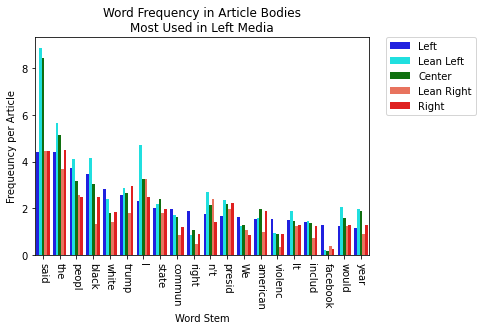

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="left", title_ = "Word Frequency in Article Bodies\nMost Used in Left Media", num_highest_used = 20)

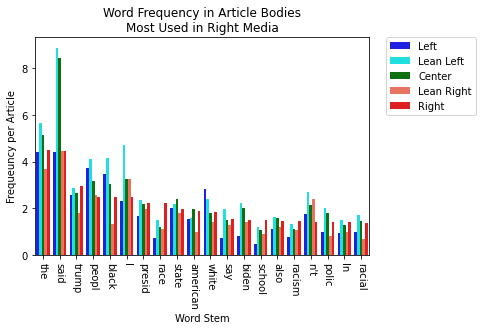

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="right", title_ = "Word Frequency in Article Bodies\nMost Used in Right Media", num_highest_used = 20)

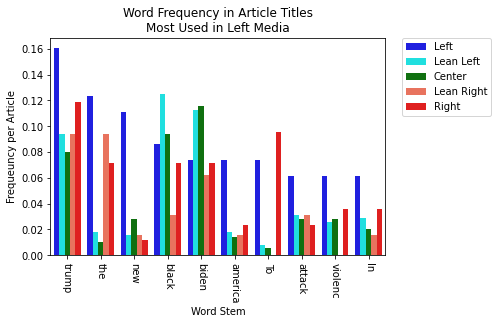

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="left", title_ = "Word Frequency in Article Titles\nMost Used in Left Media")

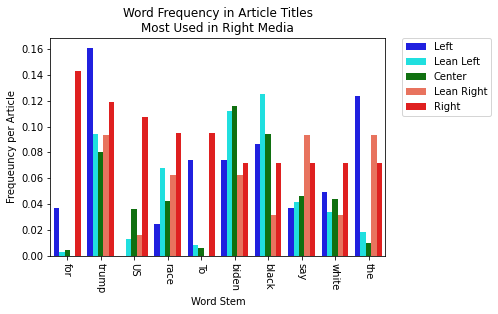

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="right", title_ = "Word Frequency in Article Titles\nMost Used in Right Media")

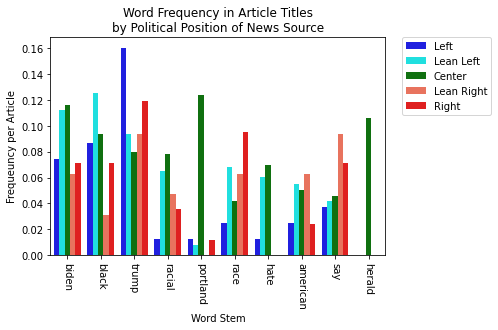

In [ ]:
plot_word_usage_by_pos(melt_title_df)

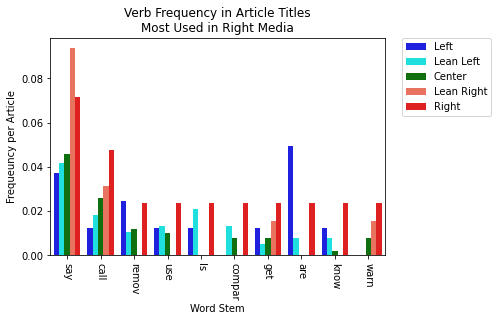

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "VB", political_position="right", title_ = "Verb Frequency in Article Titles\nMost Used in Right Media")

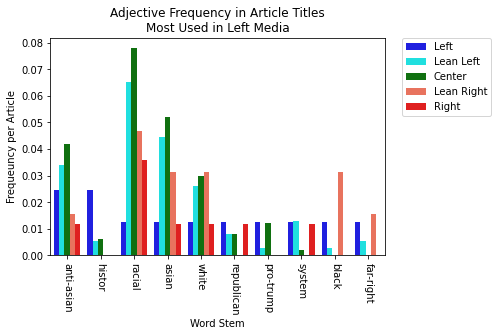

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "JJ", political_position="left", title_ = "Adjective Frequency in Article Titles\nMost Used in Left Media")

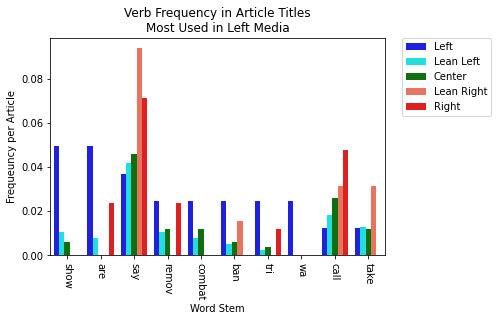

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "vb", political_position="left", title_ = "Verb Frequency in Article Titles\nMost Used in Left Media")

In [ ]:
title_stem_df.to_csv(os.path.join(main_path, "title_stem_dataframe.csv"), index = False)

In [ ]:
body_stem_df.to_csv(os.path.join(main_path, "body_stem_dataframe.csv"), index = False)

# 7/19/2021 Cells Continued (Topic and Category Analysis, section 6)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data/"

In [ ]:
import json, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
import os

In [ ]:
with open(os.path.join(main_path, "unique_article_categories.json"), "r") as cat_json:
  unique_categories = json.load(cat_json)

In [ ]:
with open(os.path.join(main_path, "unique_article_concepts.json"), "r") as concept_json:
  unique_concepts = json.load(concept_json)

In [ ]:
with open(os.path.join(main_path, 'Asian_American_Articles_in_last_year.json'), 'r') as aapi_json:
  articles = json.load(aapi_json)

In [ ]:
df = pd.read_csv(os.path.join(main_path, "section_5_full_df.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN""]","[""florham"", ""park"", ""new"", ""jersey"", ""sam"", ""d...","[""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""JJ..."
3,-0.364706,16,658220

In [ ]:
articles[0]['uri']

'6580621447'

In [ ]:
# Add Concepts and Categories to Main DataFrame
all_concepts = ["" for i in range(df.shape[0])]
all_cat_uri = ["" for i in range(df.shape[0])]
success_count = 0
for i, article in enumerate(articles):
  if i % 50 == 0: print(i);
  if int(article['uri']) not in df['uri'].values:
    continue
  success_count += 1
  curr_index = df[df['uri'] == int(article['uri'])].index.values[0]
  all_concepts[curr_index] = json.dumps(article['concepts'])
  all_cat_uri[curr_index] = json.dumps(article['categories'])

print(f"Success Count: {success_count}")
df['categories'] = all_cat_uri
df['concepts'] = all_concepts
df.head()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
Success Count: 1112


,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Violent..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Salvati..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB""

In [ ]:
df.shape

(1112, 209)

In [ ]:
unique_categories[0]

'news/Politics'

In [ ]:
unique_concepts[0]

{'label': 'Violent extremism',
 'score': 5,
 'type': 'wiki',
 'uri': 'http://en.wikipedia.org/wiki/Violent_extremism'}

In [ ]:
# Initialize Empty Frequency Dictionaries

category_position_dict = dict((a, {
    'Left': 0,
    'Lean Left': 0,
    'Center': 0,
    'Lean Right': 0,
    'Right': 0,
    'category': a
}) for a in unique_categories)
concept_position_dict = dict((a['label'], {
    'Left': 0,
    'Lean Left': 0,
    'Center': 0,
    'Lean Right': 0,
    'Right': 0,
    'concept_data': json.dumps(a),
    'concept_label': a['label']
}) for a in unique_concepts)

In [ ]:
unique_categories[:5]

['news/Politics',
 'dmoz/Society/Issues',
 'dmoz/Society/Issues/Warfare_and_Conflict',
 'dmoz/Society/Issues/Terrorism',
 'dmoz/Society/Issues/Race-Ethnic-Religious_Relations']

In [ ]:
concept_position_dict['Black church']

{'Center': 0,
 'Lean Left': 0,
 'Lean Right': 0,
 'Left': 0,
 'Right': 0,
 'concept_data': '{"label": "Black church", "score": 4, "type": "person", "uri": "http://en.wikipedia.org/wiki/Black_church"}',
 'concept_label': 'Black church'}

In [ ]:
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Violent..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Salvati..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB""

In [ ]:

for i, row in df.iterrows():

  if i % 50 == 0: print(i);

  for cat, con in zip(json.loads(row['categories']), json.loads(row['concepts'])):

    concept_position_dict[con['label']['eng']][row['source_position']] += 1
    category_position_dict[cat['label'].replace(' ', '_')][row['source_position']] += 1


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [ ]:
concept_df = pd.DataFrame(concept_position_dict.values())
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label
0,0,3,3,0,1,"{""label"": ""Violent extremism"", ""score"": 5, ""ty...",Violent extremism
1,0,0,3,0,1,"{""label"": ""United States Department of Homelan...",United States Department of Homeland Security
2,1,2,5,0,2,"{""label"": ""Conspiracy theory"", ""score"": 4, ""ty...",Conspiracy theory
3,0,0,4,1,0,"{""label"": ""Email"", ""score"": 4, ""type"": ""wiki"",...",Email
4,0,1,2,0,1,"{""label"": ""Terrorism"", ""score"": 4, ""type"": ""wi...",Terrorism


In [ ]:
category_df = pd.DataFrame(category_position_dict.values())
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category
0,55,263,365,48,63,news/Politics
1,32,170,208,29,31,dmoz/Society/Issues
2,5,22,35,4,10,dmoz/Society/Issues/Warfare_and_Conflict
3,3,12,16,1,4,dmoz/Society/Issues/Terrorism
4,81,383,500,64,84,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...


In [ ]:
concept_df['usage_sum'] = concept_df.drop(["concept_data", 'concept_label'], axis = 1).sum(axis = 1)
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum
0,0,3,3,0,1,"{""label"": ""Violent extremism"", ""score"": 5, ""ty...",Violent extremism,7
1,0,0,3,0,1,"{""label"": ""United States Department of Homelan...",United States Department of Homeland Security,4
2,1,2,5,0,2,"{""label"": ""Conspiracy theory"", ""score"": 4, ""ty...",Conspiracy theory,10
3,0,0,4,1,0,"{""label"": ""Email"", ""score"": 4, ""type"": ""wiki"",...",Email,5
4,0,1,2,0,1,"{""label"": ""Terrorism"", ""score"": 4, ""type"": ""wi...",Terrorism,4


In [ ]:
category_df['usage_sum'] = category_df.drop("category", axis = 1).sum(axis = 1)
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum
0,55,263,365,48,63,news/Politics,794
1,32,170,208,29,31,dmoz/Society/Issues,470
2,5,22,35,4,10,dmoz/Society/Issues/Warfare_and_Conflict,76
3,3,12,16,1,4,dmoz/Society/Issues/Terrorism,36
4,81,383,500,64,84,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,1112


In [ ]:
concept_df['0_per_article_left'] = concept_df['Left'] / df[df['source_position'] == "Left"].shape[0]
concept_df['1_per_article_lean_left'] = concept_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
concept_df['4_per_article_right'] = concept_df['Right'] / df[df['source_position'] == "Right"].shape[0]
concept_df['3_per_article_lean_right'] = concept_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
concept_df['2_per_article_center'] = concept_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
category_df['0_per_article_left'] = category_df['Left'] / df[df['source_position'] == "Left"].shape[0]
category_df['1_per_article_lean_left'] = category_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
category_df['4_per_article_right'] = category_df['Right'] / df[df['source_position'] == "Right"].shape[0]
category_df['3_per_article_lean_right'] = category_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
category_df['2_per_article_center'] = category_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
for col in ["0_per_article_left","1_per_article_lean_left","4_per_article_right","3_per_article_lean_right","2_per_article_center"]:
  concept_df[f"{col}_copy"] = concept_df[col]
  category_df[f"{col}_copy"] = category_df[col]

In [ ]:
melt_concept_df = pd.melt(concept_df, id_vars = ["concept_data",
                                                  "usage_sum",
                                                  "concept_label",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_concept_df.head()

,concept_data,usage_sum,concept_label,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,"{""label"": ""Violent extremism"", ""score"": 5, ""ty...",7,Violent extremism,0.000000,0.007833,0.011905,0.000000,0.006,0_per_article_left,0.000000
1,"{""label"": ""United States Department of Homelan...",4,United States Department of Homeland Security,0.000000,0.000000,0.011905,0.000000,0.006,0_per_article_left,0.000000
2,"{""label"": ""Conspiracy theory"", ""score"": 4, ""ty...",10,Conspiracy theory,0.012346,0.005222,0.023810,0.000000,0.010,0_per_article_left,0.012346
3,"{""label"": ""Email"", ""score"": 4, ""type"": ""wiki"",...",5,Email,0.000000,0.000000,0.000000,0.015625,0.008,0_per_article_left,0.000000
4,"{""label"": ""Terrorism"", ""score"": 4, ""type"": ""wi...",4,Terrorism,0.000000,0.002611,0.011905,0.000000,0.004,0_per_article_left,0.000000


In [ ]:
melt_category_df = pd.melt(category_df, id_vars = ["category",
                                                  "usage_sum",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_category_df.head()

,category,usage_sum,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,news/Politics,794,0.679012,0.686684,0.750000,0.750000,0.730,0_per_article_left,0.679012
1,dmoz/Society/Issues,470,0.395062,0.443864,0.369048,0.453125,0.416,0_per_article_left,0.395062
2,dmoz/Society/Issues/Warfare_and_Conflict,76,0.061728,0.057441,0.119048,0.062500,0.070,0_per_article_left,0.061728
3,dmoz/Society/Issues/Terrorism,36,0.037037,0.031332,0.047619,0.015625,0.032,0_per_article_left,0.037037
4,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,1112,1.000000,1.000000,1.000000,1.000000,1.000,0_per_article_left,1.000000


In [ ]:
def plot_usage_by_pos(melt_df, kind, political_position="usage_sum", title_ = "Frequency per Article\nby News Source Political Position", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  top_kind = filt_data.groupby(kind).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  adjusted_kind = []

  for k in top_kind:
    filtered_data.extend(filt_data[filt_data[kind] == k].values.tolist())
    if kind == "category":
      adjusted_kind.extend([k.split('/')[-1]]*filt_data[filt_data[kind] == k].shape[0])
  
  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  if kind == "category":
    filtered_df[kind] = adjusted_kind

  sns.barplot(data = filtered_df, x = kind, y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel(kind.capitalize())

  plt.ylabel("Frequeuncy per Article")

  plt.show()


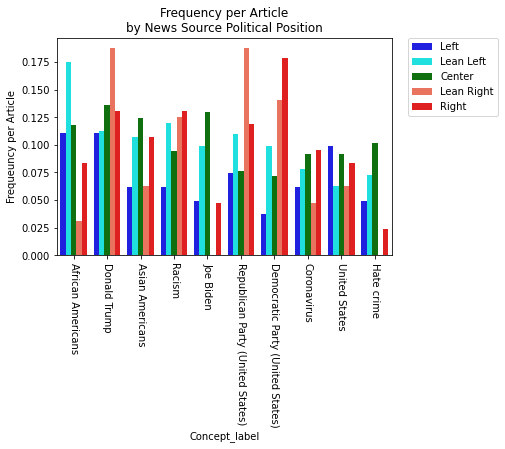

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label")

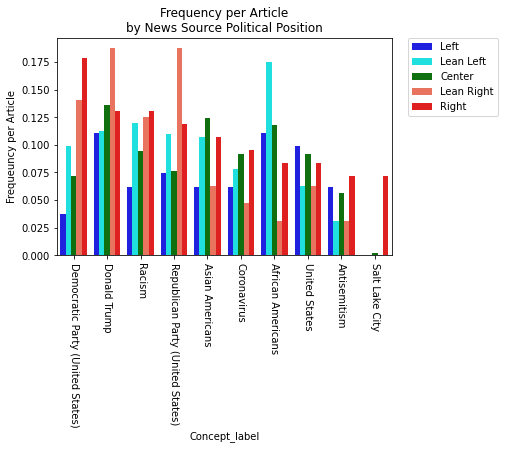

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="right")

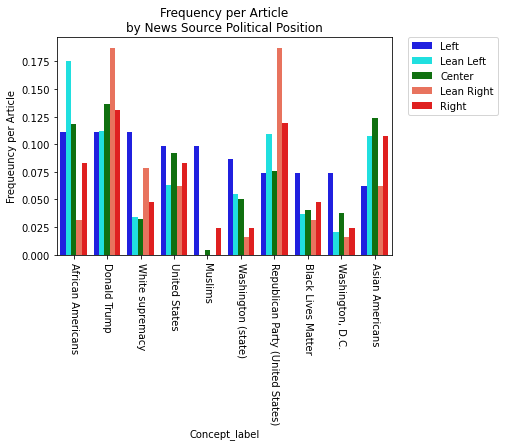

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="left")

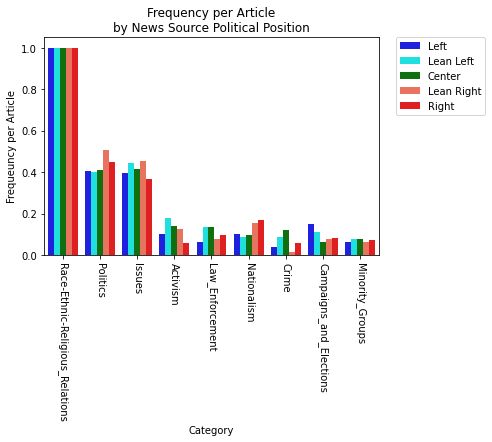

In [ ]:
plot_usage_by_pos(melt_category_df, "category")

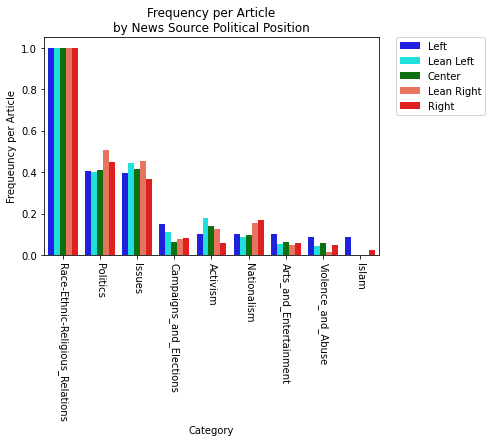

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "left")

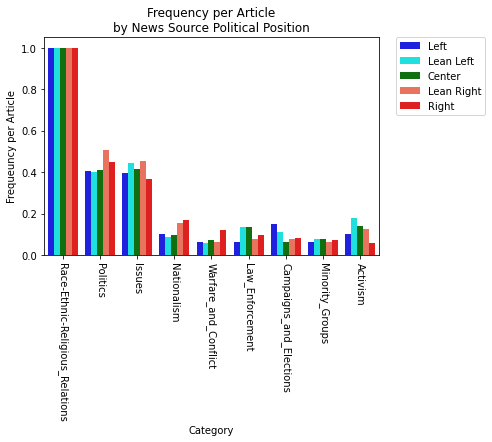

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "right")

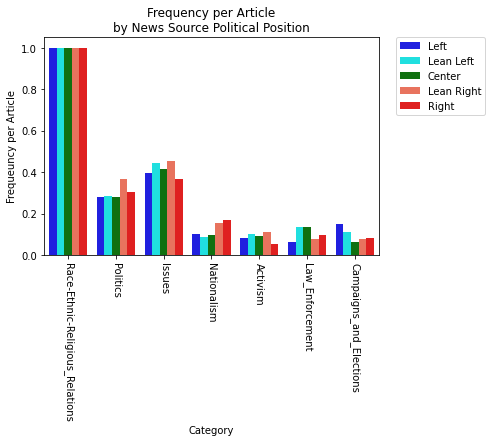

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "lean_right")

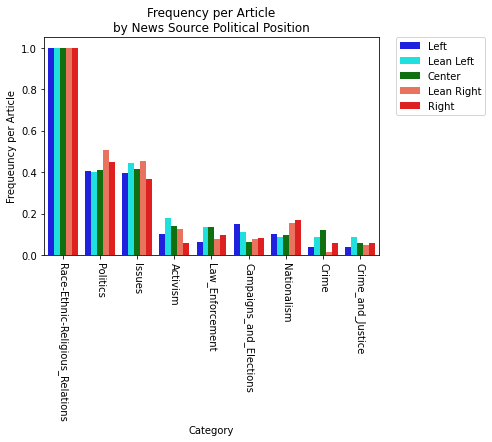

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "lean_left")

In [ ]:
concept_df.to_csv(os.path.join(main_path, "concept_dataframe.csv"), index = False)

In [ ]:
category_df.to_csv(os.path.join(main_path, "category_dataframe.csv"), index = False)

In [ ]:
df.shape

(1112, 209)

In [ ]:
df.to_csv(os.path.join(main_path, "section_6_full_df.csv"), index = False)

# 7/19/2021 Cells Continued, Supplement Analysis Word Frequency Percentage (percentage of word usage out of all words used, section 7)

## Setup

In [ ]:
df = pd.read_csv(os.path.join(main_path, "section_6_full_df.csv"))

In [ ]:
title_stem_df_2 = pd.read_csv(os.path.join(main_path, "title_stem_dataframe.csv"))

In [ ]:
body_stem_df_2 = pd.read_csv(os.path.join(main_path, "body_stem_dataframe.csv"))

In [ ]:
def plot_word_usage_by_pos(melt_df, part_of_speech=None, political_position="usage_sum", title_ = "Word Frequency in Article Titles\nby Political Position of News Source", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  if part_of_speech is not None:

    filt_data = melt_df[melt_df['pos'] == part_of_speech.upper()].sort_values(to_sort, ascending = False)  

  top_stems = filt_data.groupby(['stem', 'pos']).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  for stem, pos in top_stems:
    filtered_data.extend(filt_data[(filt_data['stem'] == stem) & (filt_data['pos'] == pos)].values.tolist())

  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  sns.barplot(data = filtered_df, x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel("Word Stem")

  plt.ylabel("Frequeuncy per Article")

  plt.show()


## Processing

In [ ]:
title_stem_df_2['0_per_article_left'] = title_stem_df_2['Left'] / df[df['source_position'] == "Left"]['title_length'].sum()
title_stem_df_2['1_per_article_lean_left'] = title_stem_df_2['Lean Left'] / df[df['source_position'] == "Lean Left"]['title_length'].sum()
title_stem_df_2['4_per_article_right'] = title_stem_df_2['Right'] / df[df['source_position'] == "Right"]['title_length'].sum()
title_stem_df_2['3_per_article_lean_right'] = title_stem_df_2['Lean Right'] / df[df['source_position'] == "Lean Right"]['title_length'].sum()
title_stem_df_2['2_per_article_center'] = title_stem_df_2['Center'] / df[df['source_position'] == "Center"]['title_length'].sum()


In [ ]:
body_stem_df_2['0_per_article_left'] = body_stem_df_2['Left'] / df[df['source_position'] == "Left"]['body_length'].sum()
body_stem_df_2['1_per_article_lean_left'] = body_stem_df_2['Lean Left'] / df[df['source_position'] == "Lean Left"]['body_length'].sum()
body_stem_df_2['4_per_article_right'] = body_stem_df_2['Right'] / df[df['source_position'] == "Right"]['body_length'].sum()
body_stem_df_2['3_per_article_lean_right'] = body_stem_df_2['Lean Right'] / df[df['source_position'] == "Lean Right"]['body_length'].sum()
body_stem_df_2['2_per_article_center'] = body_stem_df_2['Center'] / df[df['source_position'] == "Center"]['body_length'].sum()


In [ ]:
for col in ["0_per_article_left", "1_per_article_lean_left", "4_per_article_right", "3_per_article_lean_right", "2_per_article_center"]:
  title_stem_df_2[f"{col}_copy"] = title_stem_df_2[col]
  body_stem_df_2[f"{col}_copy"] = body_stem_df_2[col]


In [ ]:
title_stem_df_2.head()

,Center,Lean Left,Right,Left,Lean Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,17,3,0,1,1,u.s.,NN,22,0.001013,0.000662,0.000000,0.001353,0.002870,0.001013,0.000662,0.000000,0.001353,0.002870
1,4,0,2,0,1,warn,VB,7,0.000000,0.000000,0.001944,0.001353,0.000675,0.000000,0.000000,0.001944,0.001353,0.000675
2,3,1,1,1,1,extremist,NN,7,0.001013,0.000221,0.000972,0.001353,0.000507,0.001013,0.000221,0.000972,0.001353,0.000507
3,4,2,1,0,0,may,MD,7,0.000000,0.000441,0.000972,0.000000,0.000675,0.000000,0.000441,0.000972,0.000000,0.000675
4,1,0,1,0,0,strike,VB,2,0.000000,0.000000,0.000972,0.000000,0.000169,0.000000,0.000000,0.000972,0.000000,0.000169


In [ ]:
melt_title_df_2 = pd.melt(title_stem_df_2, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df_2.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,u.s.,22,NN,0.001013,0.000662,0.000000,0.001353,0.002870,0_per_article_left,0.001013
1,warn,7,VB,0.000000,0.000000,0.001944,0.001353,0.000675,0_per_article_left,0.000000
2,extremist,7,NN,0.001013,0.000221,0.000972,0.001353,0.000507,0_per_article_left,0.001013
3,may,7,MD,0.000000,0.000441,0.000972,0.000000,0.000675,0_per_article_left,0.000000
4,strike,2,VB,0.000000,0.000000,0.000972,0.000000,0.000169,0_per_article_left,0.000000


In [ ]:
melt_body_df_2 = pd.melt(body_stem_df_2, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df_2.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,washington,884,NN,0.001406,0.000715,0.000740,0.001019,0.000822,0_per_article_left,0.001406
1,A,823,DT,0.000598,0.000812,0.000683,0.000382,0.000795,0_per_article_left,0.000598
2,nation,528,JJ,0.000344,0.000463,0.000640,0.000509,0.000510,0_per_article_left,0.000344
3,terror,149,NN,0.000179,0.000138,0.000185,0.000085,0.000131,0_per_article_left,0.000179
4,alert,8,JJ,0.000000,0.000015,0.000014,0.000000,0.000002,0_per_article_left,0.000000


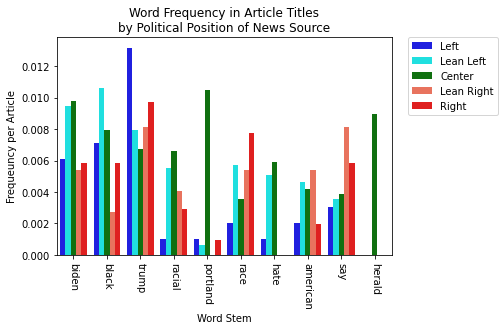

In [ ]:
plot_word_usage_by_pos(melt_title_df_2)

In [ ]:
title_stem_df_2.to_csv(os.path.join(main_path, "title_stem_df_by_word_use_percent.csv"), index = False)

In [ ]:
body_stem_df_2.to_csv(os.path.join(main_path, "body_stem_df_by_word_use_percent.csv"), index = False)

# 7/19/2021 Cells Continued (Sentence Analysis Plot, section 8)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data"

In [ ]:
import os

In [ ]:
main_df = pd.read_csv(os.path.join(main_path, "section_6_full_df.csv"))
main_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,json_data,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_NNP,title_VBZ,title_NNS,title_MD,title_VB,title_NN,title_VBP,title_$,title_CD,title_VBD,title_:,title_VBG,title_JJ,"title_,",title_'',title_RB,title_IN,title_POS,title_``,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.411765,6,6562271338,U.S. warns that extremists may strike as virus...,WASHINGTON -- A national terrorism alert issue...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-05-14,"{""uri"": ""6562271338"", ""lang"": ""eng"", ""isDuplic...",10,748,145605,/news-source/portland-press-herarld,Center,0,"[""U.S."", ""warns"", ""that"", ""extremists"", ""may"",...","[""WASHINGTON"", ""--"", ""A"", ""national"", ""terrori...",1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,-0.9964,0.1531,0.173,0.234,0.724,0.565,0.103,0.202,0,4,0.0,0.005348,"[""u.s."", ""warn"", ""extremist"", ""may"", ""strike"",...","[""NN"", ""VB"", ""NN"", ""MD"", ""VB"", ""NN"", ""NN"", ""VB""]","[""washington"", ""A"", ""nation"", ""terror"", ""alert...","[""NN"", ""DT"", ""JJ"", ""NN"", ""JJ"", ""VB"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Violent..."
1,0.121569,7,6478206548,Jesuits pledge $100 million for descendants of...,WASHINGTON -- One of the Catholic Church's mos...,pressherald.com,Portland Press Herald,12299,39825,313417,True,2021-03-17,"{""uri"": ""6478206548"", ""lang"": ""eng"", ""isDuplic...",18,1080,145605,/news-source/portland-press-herarld,Center,0,"[""Jesuits"", ""pledge"", ""$"", ""100"", ""million"", ""...","[""WASHINGTON"", ""--"", ""One"", ""of"", ""the"", ""Cath...",4,0,3,0,0,1,1,1,2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,center,-0.7845,-0.4019,0.087,0.153,0.821,0.847,0.092,0.000,0,53,0.0,0.049074,"[""jesuit"", ""pledg"", ""100"", ""million"", ""descend...","[""NN"", ""VB"", ""CD"", ""CD"", ""NN"", ""NN"", ""NN"", ""NN...","[""washington"", ""one"", ""cathol"", ""church"", ""wel...","[""NN"", ""CD"", ""NN"", ""NN"", ""JJ"", ""JJ"", ""NN"", ""VB...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http://en.wikipedia.org/wiki/Salvati..."
2,0.043137,6,6198522667,NFL teams huddling up to devise plans for soci...,"Florham Park, New Jersey - Sam Darnold watched...",japantimes.co.jp,The Japan Times,688,4954,207467,True,2020-08-30,"{""uri"": ""6198522667"", ""lang"": ""eng"", ""isDuplic...",10,1189,109816,/news-source/japan-times-media-bias,Center,0,"[""NFL"", ""teams"", ""huddling"", ""up"", ""to"", ""devi...","[""Florham"", ""Park"", "","", ""New"", ""Jersey"", ""-"",...",1,0,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,center,0.9266,0.0000,0.057,0.000,0.863,1.000,0.080,0.000,0,113,0.0,0.095038,"[""nfl"", ""team"", ""huddl"", ""devis"", ""plan"", ""soc...","[""NN"", ""NN"", ""VB""

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sent_tokenize("hello world. I love to eat chicken wings")

['hello world.', 'I love to eat chicken wings']

In [ ]:
import json

In [ ]:
sent_lengths = []
for doc in main_df['body'].values:
  sent_lengths.append(len(sent_tokenize(doc)))
sent_max_length = max(sent_lengths)
sent_max_length

251

In [ ]:
list(zip(main_df['source_position'].value_counts().index.values, main_df['source_position'].value_counts().values))

[('Center', 500),
 ('Lean Left', 383),
 ('Right', 84),
 ('Left', 81),
 ('Lean Right', 64)]

In [ ]:
body_sent_docs_by_position = dict((pos, np.zeros((num, sent_max_length, 3))) for pos, num in zip(main_df['source_position'].value_counts().index.values, main_df['source_position'].value_counts().values))

# dimensions: 1) number of docs, 2) number of sentences, 3) number of pos occurences [JJ, NN, VB]

pos_dict = {
    'JJ': 0,
    'NN': 1,
    'VB': 2
}

index_by_position = dict((pos, 0) for pos in ['Left', 'Lean Left', 'Center', 'Lean Right', 'Right'])

for i, row in main_df.iterrows():
  if i % 50 == 0: print(i);
  for j, sent in enumerate(sent_tokenize(row['body'])):
    for w, p in nltk.pos_tag(word_tokenize(sent)):
      if p[:2] in ['JJ', 'NN', 'VB']:
        body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j][pos_dict[p[:2]]] += 1
    body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j] = body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j] / sum(body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j])
  index_by_position[row['source_position']] += 1

index_by_position

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


{'Center': 500, 'Lean Left': 383, 'Lean Right': 64, 'Left': 81, 'Right': 84}

In [ ]:
np.zeros((2,3,4)).mean(axis=0).shape

(3, 4)

In [ ]:
body_average_dfs_by_position = {}

for k in body_sent_docs_by_position.keys():
  
  body_average_dfs_by_position[k] = pd.DataFrame(body_sent_docs_by_position[k].mean(axis = 0), columns = ["adj", "noun", "verb"])
  body_average_dfs_by_position[k]['x'] = body_average_dfs_by_position[k].index

body_average_dfs_by_position['Left'].shape

(251, 4)

In [ ]:
body_relative_dfs_by_position = {}

for k in body_sent_docs_by_position.keys():
  temp_array = body_sent_docs_by_position[k].mean(axis = 0)

  body_relative_dfs_by_position[k] = pd.DataFrame(temp_array/temp_array.sum(axis = -1, keepdims = True), columns = ["adj", "noun", "verb"]).fillna(0)
  body_relative_dfs_by_position[k]['x'] = body_relative_dfs_by_position[k].index

body_relative_dfs_by_position['Left'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(251, 4)

In [ ]:
body_average_dfs_by_position['Left'].head()

,adj,noun,verb,x
0,0.112231,0.708734,0.179034,0
1,NaN,NaN,NaN,1
2,0.132455,0.621468,0.246078,2
3,0.115155,0.570820,0.301679,3
4,0.116350,0.565810,0.293149,4


In [ ]:
sns.set_theme()

## Average POS per SENTENCE

Text(0.5, 0, 'sentence number')

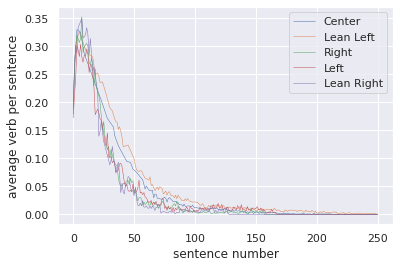

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "verb", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average verb per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

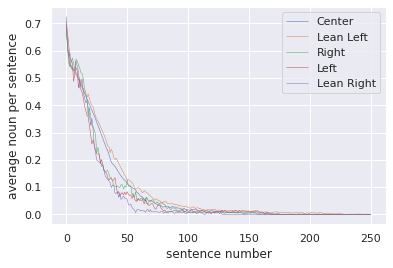

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "noun", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average noun per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

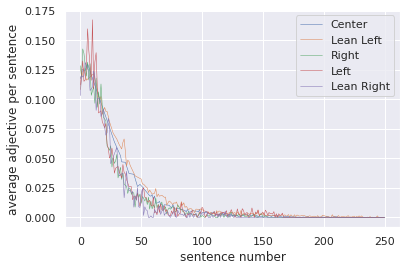

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "adj", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average adjective per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

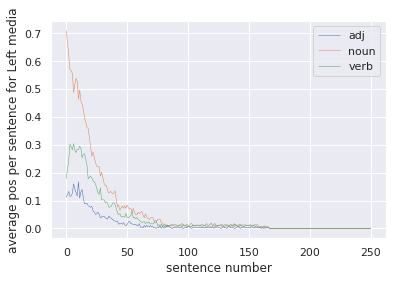

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Left"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Left media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

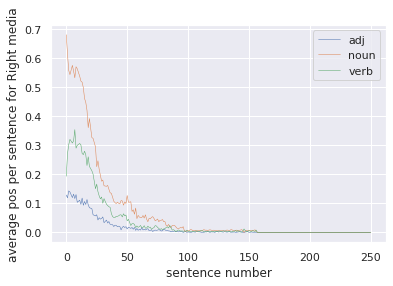

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Right"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Right media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

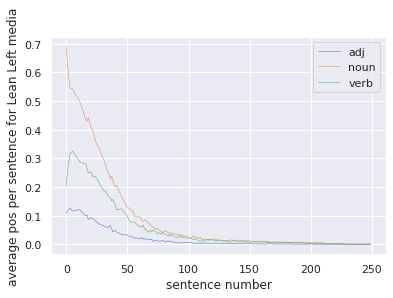

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Lean Left"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Lean Left media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

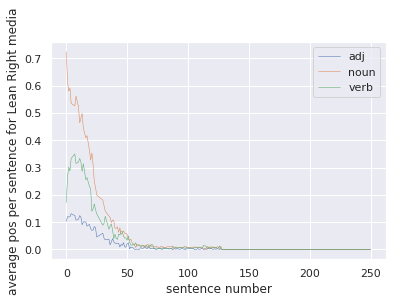

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Lean Right"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Lean Right media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

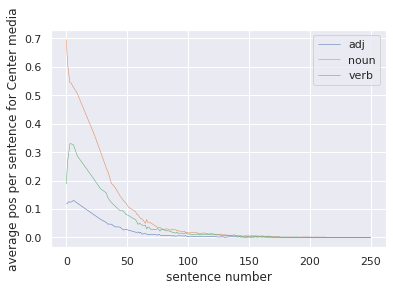

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Center"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Center media")
plt.xlabel("sentence number")

## Relative POS in SENTENCE

Text(0.5, 0, 'sentence number')

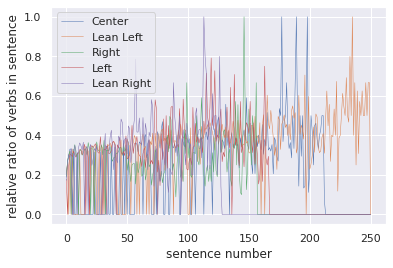

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "verb", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of verbs in sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

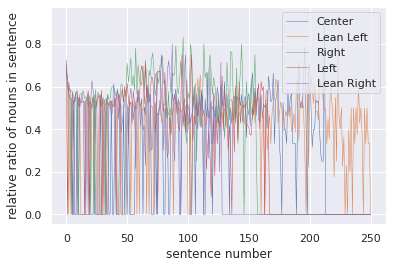

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "noun", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of nouns in sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

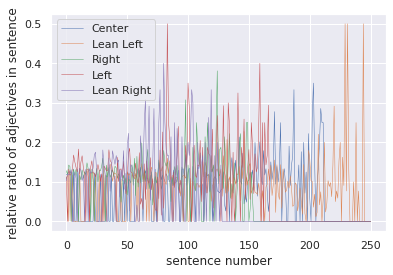

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "adj", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of adjectives in sentence")
plt.xlabel("sentence number")

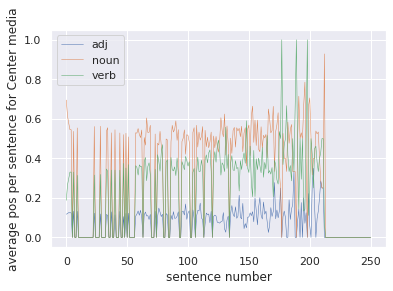

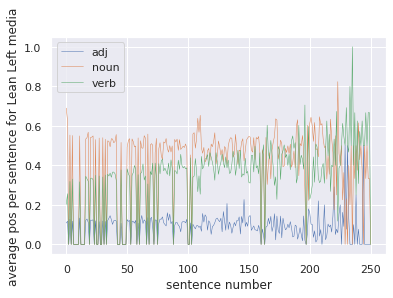

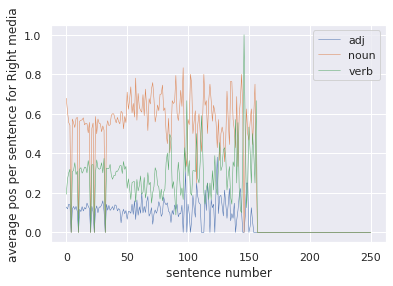

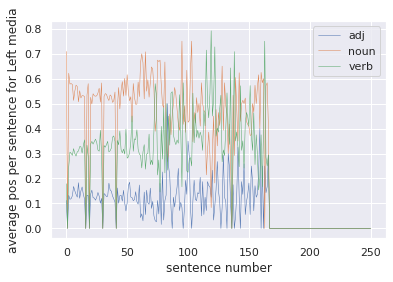

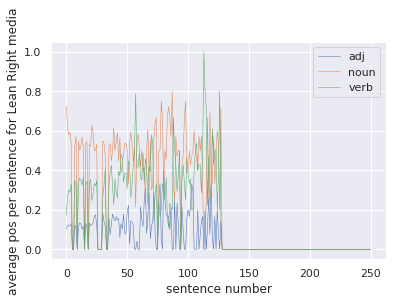

In [ ]:
for k in body_relative_dfs_by_position.keys():
  plt.figure()
  for pos in ['adj', 'noun', 'verb']:
    sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = pos, label = pos, linewidth = .5)

  plt.legend()
  plt.ylabel(f"average pos per sentence for {k} media")
  plt.xlabel("sentence number")

# 7/19/2021 Cells (Concept Type Analysis, section 9)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/control_group_data"

In [ ]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,0,3,3,0,1,"{""label"": ""Violent extremism"", ""score"": 5, ""ty...",Violent extremism,7,0.000000,0.007833,0.011905,0.000000,0.006,0.000000,0.007833,0.011905,0.000000,0.006
1,0,0,3,0,1,"{""label"": ""United States Department of Homelan...",United States Department of Homeland Security,4,0.000000,0.000000,0.011905,0.000000,0.006,0.000000,0.000000,0.011905,0.000000,0.006
2,1,2,5,0,2,"{""label"": ""Conspiracy theory"", ""score"": 4, ""ty...",Conspiracy theory,10,0.012346,0.005222,0.023810,0.000000,0.010,0.012346,0.005222,0.023810,0.000000,0.010
3,0,0,4,1,0,"{""label"": ""Email"", ""score"": 4, ""type"": ""wiki"",...",Email,5,0.000000,0.000000,0.000000,0.015625,0.008,0.000000,0.000000,0.000000,0.015625,0.008
4,0,1,2,0,1,"{""label"": ""Terrorism"", ""score"": 4, ""type"": ""wi...",Terrorism,4,0.000000,0.002611,0.011905,0.000000,0.004,0.000000,0.002611,0.011905,0.000000,0.004


In [ ]:
import json

In [ ]:
counter = 0
for i, row in concept_df.iterrows():
  concept_data = json.loads(row['concept_data'])
  if 'type' not in concept_data.keys():
    counter += 1
    print(counter)

In [ ]:
concept_type = []
for i, row in concept_df.iterrows():
  concept_data = json.loads(row['concept_data'])
  concept_type.append(concept_data['type'])

concept_df['concept_type'] = concept_type
concept_df['concept_type'].head()

0    wiki
1     org
2    wiki
3    wiki
4    wiki
Name: concept_type, dtype: object

In [ ]:
concept_df['concept_type'].value_counts()

wiki      3374
loc       1542
person    1522
org        935
Name: concept_type, dtype: int64

In [ ]:
type_dict = {}
for type_ in concept_df['concept_type'].unique():
  type_dict[type_] = concept_df[concept_df['concept_type'] == type_].copy()
type_dict.keys()

dict_keys(['wiki', 'org', 'loc', 'person'])

In [ ]:
type_data = {}
for type_ in type_dict.keys():
  type_data[type_] = type_dict[type_][['0_per_article_left', 	'1_per_article_lean_left', 	'4_per_article_right',	'3_per_article_lean_right', 	'2_per_article_center']].values.mean(axis = 0)


In [ ]:
type_df = pd.DataFrame(type_data, index = ['0_per_article_left', 	'1_per_article_lean_left', 	'2_per_article_center', '3_per_article_lean_right','4_per_article_right' 	])
type_df['index'] = type_df.index
type_df

,wiki,org,loc,person,index
0_per_article_left,0.000790,0.000700,0.000665,0.000422,0_per_article_left
1_per_article_lean_left,0.000694,0.000631,0.000615,0.000582,1_per_article_lean_left
2_per_article_center,0.000617,0.000726,0.000649,0.000634,2_per_article_center
3_per_article_lean_right,0.000537,0.001070,0.000588,0.000770,3_per_article_lean_right
4_per_article_right,0.000694,0.000595,0.000719,0.000543,4_per_article_right


[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

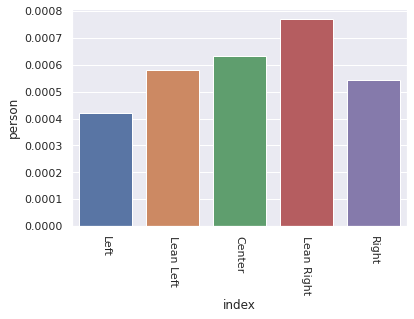

In [ ]:
sns.barplot(data = type_df, x = "index", y = "person")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

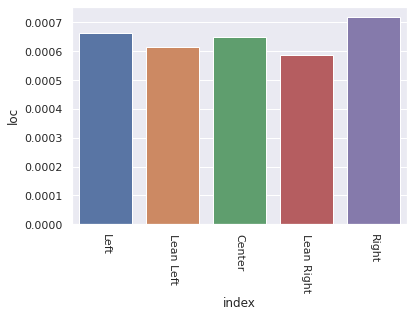

In [ ]:
sns.barplot(data = type_df, x = "index", y = "loc")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

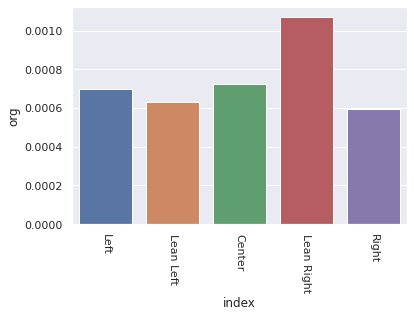

In [ ]:
sns.barplot(data = type_df, x = "index", y = "org")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

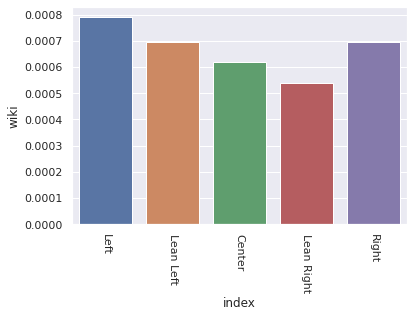

In [ ]:
sns.barplot(data = type_df, x = "index", y = "wiki")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

In [ ]:
concept_df.to_csv(os.path.join(main_path, "concept_dataframe.csv"), index = False)

In [ ]:
type_df.to_csv(os.path.join(main_path, "concept_type_df.csv"), index = False)

# End of ETL, Move on to next step of Visualization, Observation, Analyses and Inferences